In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import random
import math
import numpy as np

In [2]:
df=pd.read_csv('../data/survey_results_public.csv')

In [3]:
print('df has {} rows and {} columns'.format(*df.shape))

df has 64461 rows and 61 columns


In [4]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [5]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [6]:
all_categoricals=[]
all_multi_options=[]
all_numericals=[]

In [7]:
all_categoricals.append('MainBranch')
# df['MainBranch'].unique()
# df['MainBranch'].hist(xrot=90)
# df[['MainBranch', 'ConvertedComp']].boxplot(by='MainBranch', showfliers=False, rot=90)

In [8]:
all_numericals.append('Age')
# pd.to_numeric(df['Age'], errors='coerce').hist(bins=100, xrot=90)

In [9]:
all_numericals.append('Age1stCode')
# pd.to_numeric(df['Age1stCode'], errors='coerce').hist(bins=100, xrot=90)

In [10]:
all_categoricals.append('Country')
# df['Country'].unique()
# df['Country'].hist(xrot=90, figsize=(20, 5))

In [11]:
all_multi_options.append('DatabaseWorkedWith')
# df['DatabaseWorkedWith'].str.get_dummies(sep=';').sum().plot(kind='bar', rot=90)
df['DatabaseWorkedWithCnt']=df['DatabaseWorkedWith'].str.split(';').str.len()
# df[['DatabaseWorkedWithCnt', 'ConvertedComp']].boxplot(by='DatabaseWorkedWithCnt', showfliers=False)
all_numericals.append('DatabaseWorkedWithCnt')

In [12]:
all_multi_options.append('DevType')
# df['DevType'].str.get_dummies(sep=';').sum().plot(kind='bar', rot=90)
df['DevTypeCnt']=df['DevType'].str.split(';').str.len()
# df[['DevTypeCnt', 'ConvertedComp']].boxplot(by='DevTypeCnt', showfliers=False, rot=90)
all_numericals.append('DevTypeCnt')

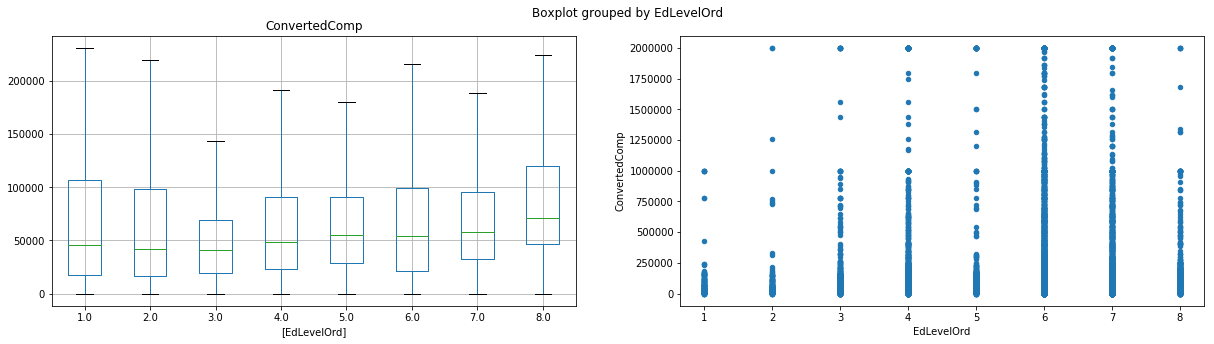

In [13]:
all_categoricals.append('EdLevel')
# # df['EdLevel'].hist(xrot=90)
degree_mapping={'I never completed any formal education': 1, 
                'Primary/elementary school': 2, 
                'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 3, 
                'Some college/university study without earning a degree': 4, #3
                'Associate degree (A.A., A.S., etc.)': 5, #4
                'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 6, 
                'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 7, 
                'Other doctoral degree (Ph.D., Ed.D., etc.)': 8}
all_numericals.append('EdLevelOrd')
df['EdLevelOrd']=df['EdLevel'].map(degree_mapping)
fig, ax=plt.subplots(1, 2, figsize=(20, 5))
df[['EdLevelOrd', 'ConvertedComp']].boxplot(by='EdLevelOrd', showfliers=False, ax=ax[0])
df[['EdLevelOrd', 'ConvertedComp']].plot(kind='scatter', x='EdLevelOrd', y='ConvertedComp', ax=ax[1])
# df['EdLevelOrd'].value_counts().sort_index()

In [14]:
all_categoricals.append('Employment')
# df['Employment'].hist(xrot=90)

In [15]:
# multi_options.append('Ethnicity')
# df['Ethnicity'].str.get_dummies(sep=';')

In [16]:
all_multi_options.append('Gender')
# dummies=df['Gender'].str.get_dummies(sep=';')
# gender_list=dummies.columns
# melt_df=pd.melt(pd.concat([df['ConvertedComp'], dummies], axis=1), id_vars=['ConvertedComp'], value_vars=gender_list)
# melt_df[melt_df['value']==1].boxplot(by='variable', column='ConvertedComp', showfliers=False, vert=False)
df['GenderCnt']=df['Gender'].str.split(';').str.len()
# df[['GenderCnt', 'ConvertedComp']].boxplot(by='GenderCnt', showfliers=False, rot=90)
all_numericals.append('GenderCnt')

In [17]:
all_multi_options.append('LanguageWorkedWith')
# df['LanguageWorkedWith'].str.get_dummies(sep=';').sum().plot(kind='bar', rot=90)
df['LanguageWorkedWithCnt']=df['LanguageWorkedWith'].str.split(';').str.len()
# df[['LanguageWorkedWithCnt', 'ConvertedComp']].boxplot(by='LanguageWorkedWithCnt', showfliers=False, rot=90)
all_numericals.append('LanguageWorkedWithCnt')

In [18]:
all_multi_options.append('MiscTechWorkedWith')
# df['MiscTechWorkedWith'].str.get_dummies(sep=';').sum().plot(kind='bar', rot=90)
df['MiscTechWorkedWithCnt']=df['MiscTechWorkedWith'].str.split(';').str.len()
# df[['MiscTechWorkedWithCnt', 'ConvertedComp']].boxplot(by='MiscTechWorkedWithCnt', showfliers=False, rot=90)
all_numericals.append('MiscTechWorkedWithCnt')

In [19]:
all_multi_options.append('NEWCollabToolsWorkedWith')
# df['NEWCollabToolsWorkedWith'].str.get_dummies(sep=';').sum().plot(kind='bar', rot=90)
df['NEWCollabToolsWorkedWithCnt']=df['NEWCollabToolsWorkedWith'].str.split(';').str.len()
# df[['NEWCollabToolsWorkedWithCnt', 'ConvertedComp']].boxplot(by='NEWCollabToolsWorkedWithCnt', showfliers=False, rot=90)
all_numericals.append('NEWCollabToolsWorkedWithCnt')

In [20]:
all_categoricals.append('OpSys')
# df['OpSys'].hist(xrot=90)

In [21]:
all_multi_options.append('PlatformWorkedWith')
# df['PlatformWorkedWith'].str.get_dummies(sep=';').sum().plot(kind='bar', rot=90)
df['PlatformWorkedWithCnt']=df['PlatformWorkedWith'].str.split(';').str.len()
# df[['PlatformWorkedWithCnt', 'ConvertedComp']].boxplot(by='PlatformWorkedWithCnt', showfliers=False, rot=90)
all_numericals.append('PlatformWorkedWithCnt')

In [22]:
all_categoricals.append('UndergradMajor')
# df['UndergradMajor'].hist(xrot=90)

In [23]:
all_multi_options.append('WebframeWorkedWith')
# df['WebframeWorkedWith'].str.get_dummies(sep=';').sum().plot(kind='bar', rot=90)

In [24]:
all_numericals.append('YearsCode')
# pd.to_numeric(df['YearsCode'], errors='coerce').hist(bins=100, xrot=90)

In [25]:
all_numericals.append('YearsCodePro')
# df['YearsCodeProNEW']=pd.to_numeric(df['YearsCodePro'], errors='coerce').map(lambda x: min(x, 10))
# pd.to_numeric(df['YearsCodePro'], errors='coerce').hist(bins=100, xrot=90)

In [26]:
# numericals=['Age', 'Age1stCode', 'YearsCode', 'YearsCodePro']
# # numericals=['YearsCodePro']
# categoricals=['MainBranch', 'Country', 'EdLevel', 'Employment', 'OpSys', 'UndergradMajor']
# # categoricals=['EdLevel']
# multi_options=['DatabaseWorkedWith', 'DevType', 'Gender', 'LanguageWorkedWith', 'MiscTechWorkedWith', 'NEWCollabToolsWorkedWith', 'PlatformWorkedWith', 'WebframeWorkedWith']
# # multi_options=['DatabaseWorkedWith', 'DevType', 'LanguageWorkedWith', 'MiscTechWorkedWith', 'NEWCollabToolsWorkedWith', 'PlatformWorkedWith', 'WebframeWorkedWith']

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler

columns=2

def run_model(X): 
    print(f'{X.shape} before trim')
    y=X.dropna()['ConvertedComp']
    input_ary=X.dropna().drop('ConvertedComp', axis=1)
#     y=X.dropna()['ConvertedComp']
    print(f'{input_ary.shape} after trim')        
#     mmscaler=MinMaxScaler()
#     print(input_ary.isnull().sum().sum())
#     print(y.isnull().sum().sum())
#     X_train, X_test, y_train_scaled, y_test_scaled=train_test_split(input_ary, y.reshape(-1))
    X_train, X_test, y_train, y_test=train_test_split(input_ary, y)
    yscaler=StandardScaler()
#     y=mmscaler.fit_transform(y.values.reshape(-1, 1))
    yscaler.fit(y_train.values.reshape(-1, 1))
    y_train_scaled=yscaler.transform(y_train.values.reshape(-1, 1))
    y_test_scaled=yscaler.transform(y_test.values.reshape(-1, 1))
    xcaler=StandardScaler()
    xcaler.fit(X_train)
    X_train_scaled=xcaler.transform(X_train)
    X_test_scaled=xcaler.transform(X_test)
#     mmscaler.fit(pd.DataFrame(y_train))
#     y_train_scaled=mmscaler.transform(y_train.values.reshape(1, -1))
#     y_test_scaled=mmscaler.transform(y_test.values.reshape(1, -1))
#     y_train_scaled=mmscaler.transform(pd.DataFrame(y_train))
#     y_test_scaled=mmscaler.transform(pd.DataFrame(y_test))
    rfr=RandomForestRegressor()
    rfr.fit(X_train_scaled, y_train_scaled)
    print(f'RFR Train Score: {rfr.score(X_train_scaled, y_train_scaled)}')
    print(f'RFR Test Score: {rfr.score(X_test_scaled, y_test_scaled)}')
    lr=LinearRegression()
    lr.fit(X_train_scaled, y_train_scaled)
    print(f'LR Train Score: {lr.score(X_train_scaled, y_train_scaled)}')
    print(f'LR Test Score: {lr.score(X_test_scaled, y_test_scaled)}')
    print(sorted(list(zip(input_ary.columns, rfr.feature_importances_)), key=lambda x: x[1], reverse=True)[:10])
    return None

In [28]:
# X=df[(df['ConvertedComp']<=500000) & (df['ConvertedComp']>=10000) & (df['Employment']=='Employed full-time')]#[['ConvertedComp']]
def transform_data(input_df, numericals=[], categoricals=[], multi_options=[]): 
    print(input_df.shape)
#     input_df=input_df[numericals+cateogoricals+multi_options].dropna()
    input_df=input_df.dropna(subset=numericals+categoricals+multi_options+['ConvertedComp'])
    X=input_df[['ConvertedComp']]
    columns=2
    fig, ax=plt.subplots(math.ceil(len(numericals)/columns), columns*2, figsize=(20, 20))
    for idx, each_col in enumerate(numericals): 
        if len(numericals)>2: 
            plt_ax_1=ax[int(idx/columns)][(idx%columns)*2]
            plt_ax_2=ax[int(idx/columns)][(idx%columns)*2+1]
        else: 
            plt_ax_1=ax[(idx%columns)*2]
            plt_ax_2=ax[(idx%columns)*2+1]
        X=pd.concat([X, pd.to_numeric(input_df[each_col], errors='coerce')], axis=1)                                                             # idx = 2 & 3
        X[['ConvertedComp', each_col]].boxplot(by=each_col, showfliers=False, rot=90, ax=plt_ax_1) # wants 0 & 2 when idx = 0 & 1 which means + 0 and + 1
                                                                                                                                                      # idx = 2 & 3
        X[['ConvertedComp', each_col]].plot(x=each_col, y='ConvertedComp', kind='scatter', ax=plt_ax_2) # wants 1 & 3 when idx = 0 & 1 which means + 1 and + 2
        plt_ax_2.set_title(each_col)
        plt_ax_1.set_title(each_col)
        plt_ax_1.grid(False)
    fig.suptitle('')
    fig.tight_layout()
    fig, ax=plt.subplots(math.ceil(len(categoricals)/columns), columns, figsize=(20, 10))
    for idx, each_col in enumerate([col for col in categoricals if col!='Country']): 
        if len(categoricals)>2: 
            plt_ax=ax[int(idx/columns)][idx%columns]
        else: 
            plt_ax=ax[idx%columns]
        X=pd.concat([X, pd.get_dummies(input_df[each_col])], axis=1)
        input_df[[each_col, 'ConvertedComp']].boxplot(by=each_col, showfliers=False, vert=False, ax=plt_ax)
        plt_ax.grid(False)
        plt_ax.set_title(each_col)
    fig.suptitle('')
    fig.tight_layout()
    fig, ax=plt.subplots(math.ceil(len(multi_options)/columns), columns, figsize=(20, 20))
    for idx, each_col in enumerate(multi_options): 
        if len(multi_options)>2: 
            plt_ax=ax[int(idx/columns)][idx%columns]
        else: 
            plt_ax=ax[idx%columns]
        dummies=input_df[each_col].str.get_dummies(sep=';')
        X=pd.concat([X, dummies], axis=1)
        options_list=dummies.columns
        melt_df=pd.melt(pd.concat([input_df['ConvertedComp'], dummies], axis=1), id_vars=['ConvertedComp'], value_vars=options_list)
        melt_df[melt_df['value']==1].boxplot(by='variable', column='ConvertedComp', showfliers=False, vert=False, ax=plt_ax)
        plt_ax.grid(False)
        plt_ax.set_title(each_col)
    fig.suptitle('')
    fig.tight_layout()
#     input_df[numericals].corr().style.background_gradient(cmap="summer")
    print(X.shape)
    return X

In [29]:
all_numericals=list(set(all_numericals))
all_categoricals=list(set(all_categoricals))
all_multi_options=list(set(all_multi_options))
print(f'{len(all_numericals)} + {len(all_categoricals)} + {len(all_multi_options)}')

12 + 6 + 8


(64461, 69)
(15269, 166)


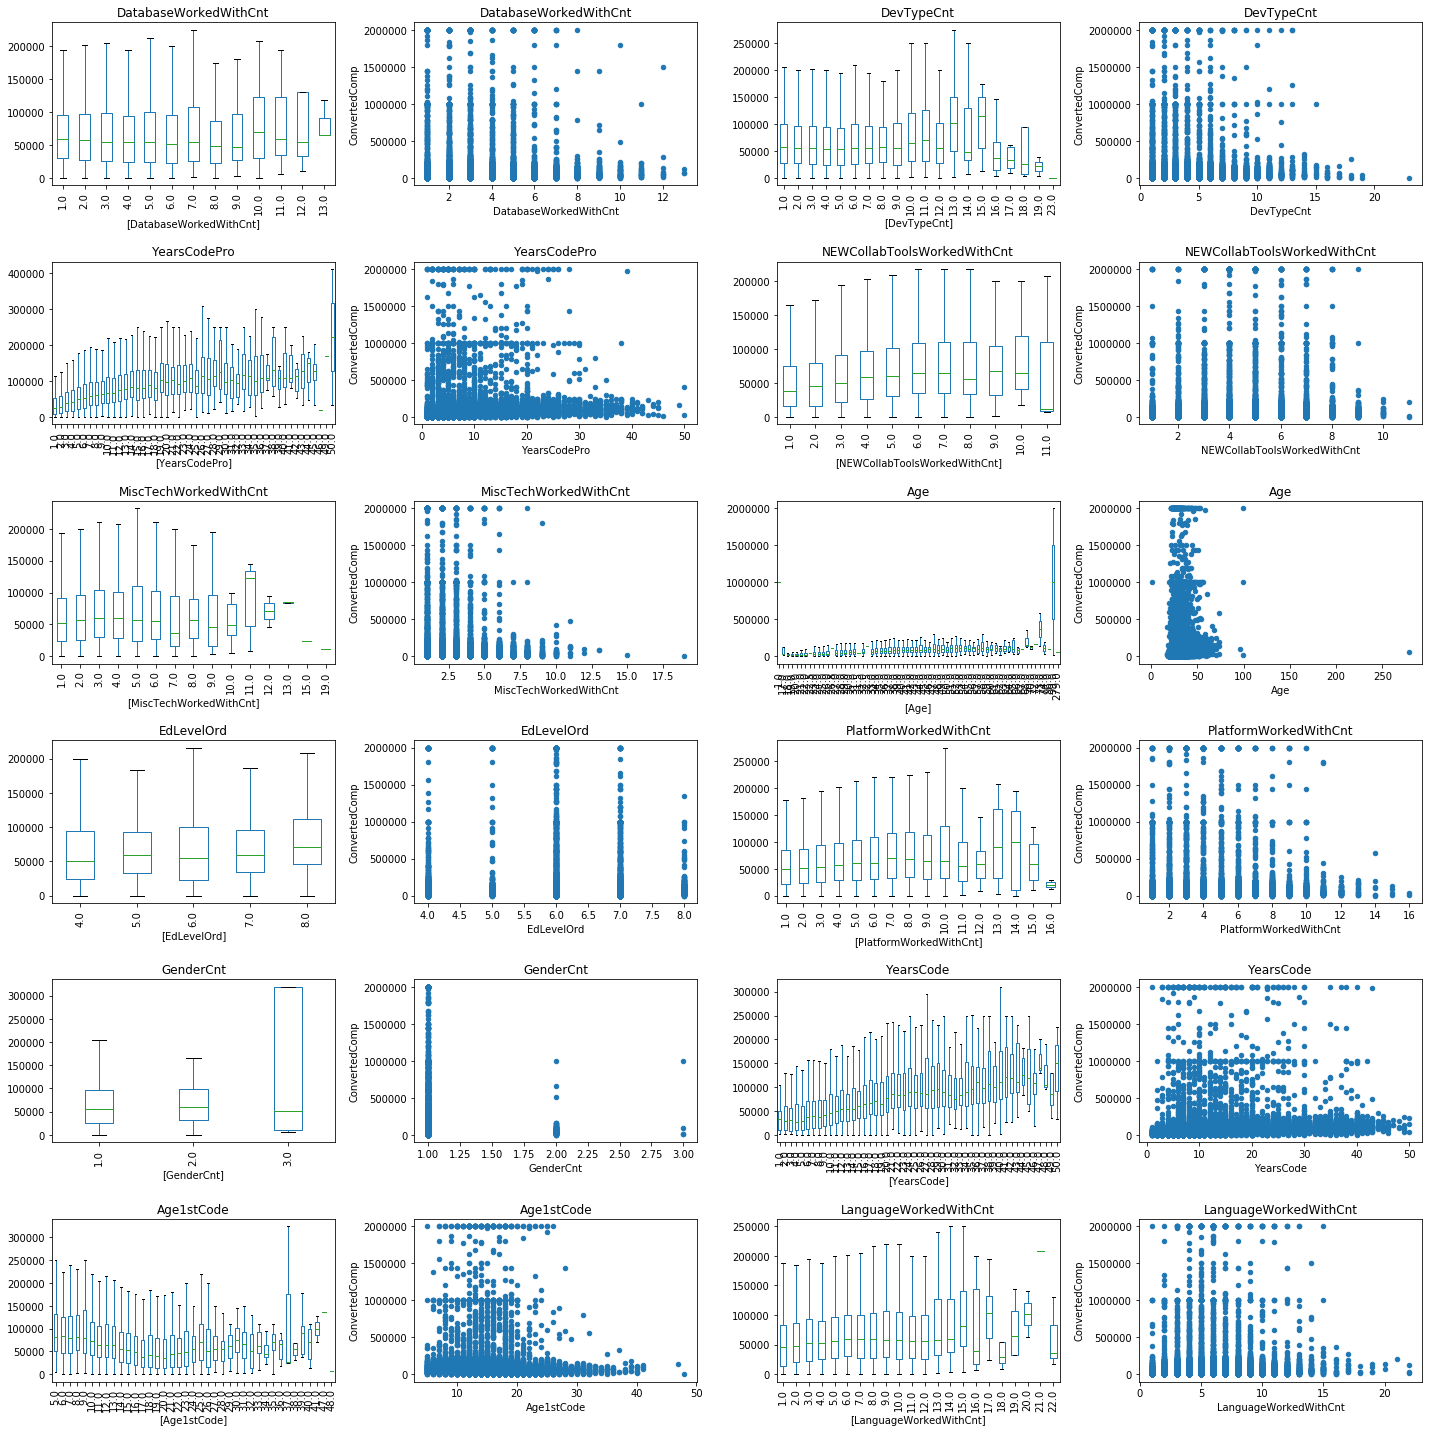

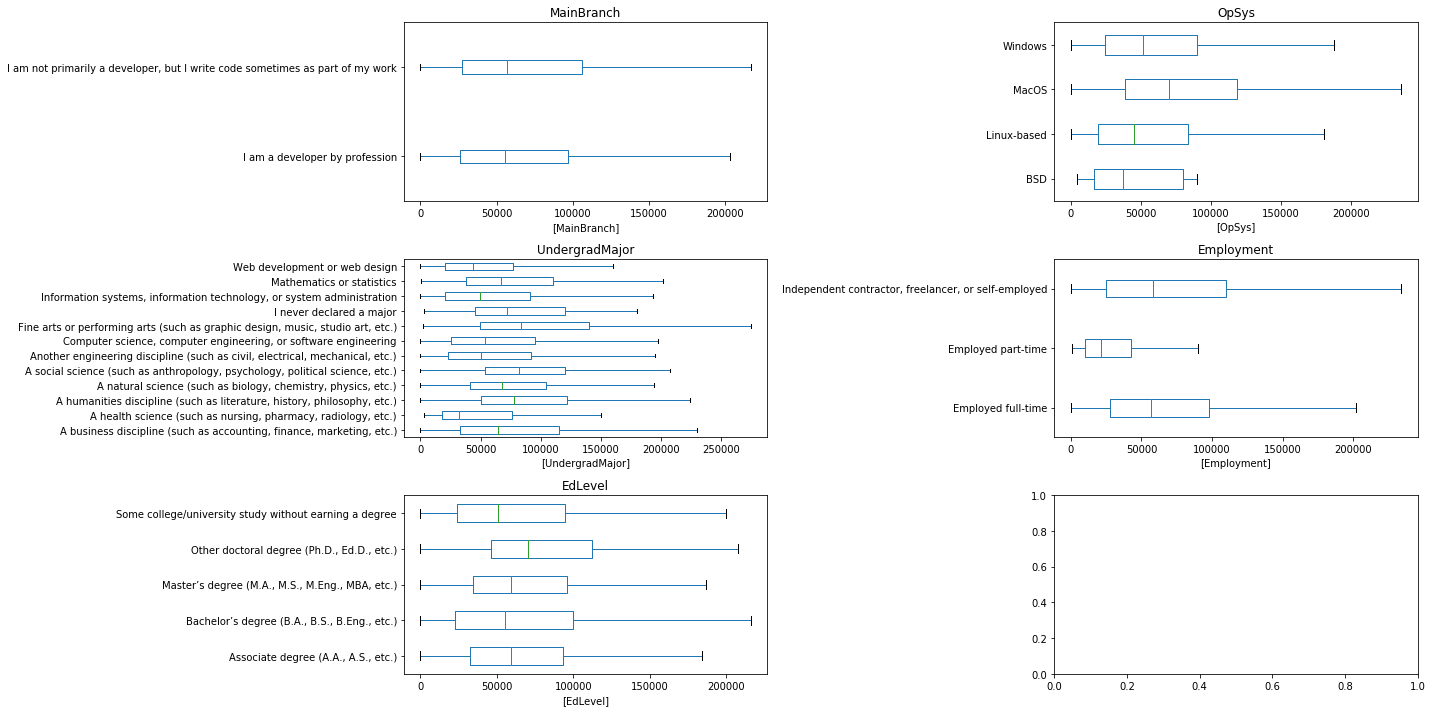

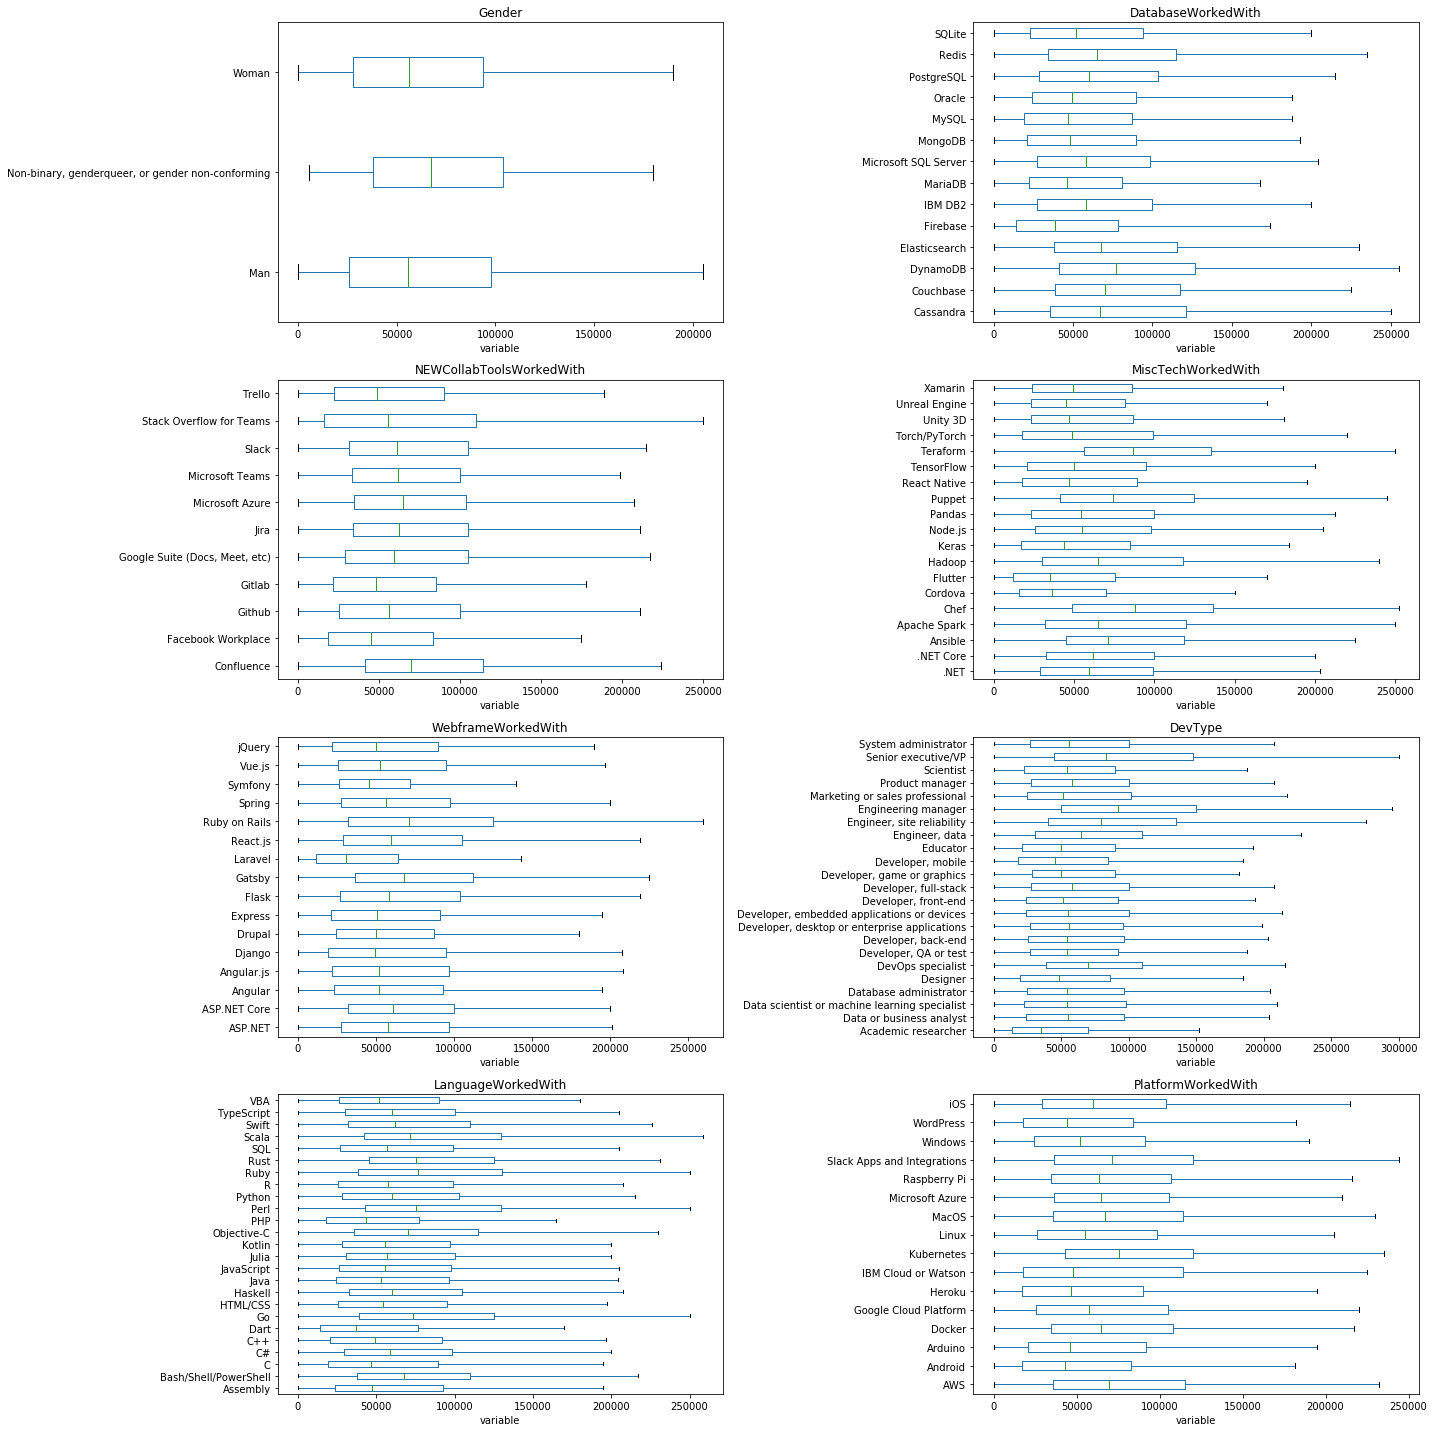

In [30]:
all_df=transform_data(df, numericals=all_numericals, categoricals=all_categoricals, multi_options=all_multi_options)

In [31]:
run_model(all_df)

(15269, 166) before trim
(14661, 165) after trim


/Users/kevinlee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RFR Train Score: 0.8545858616823768
RFR Test Score: -0.039595223584155015
LR Train Score: 0.05358531166113323
LR Test Score: 0.022966719559369575
[('Age1stCode', 0.048420336606524464), ('Age', 0.04515247191597646), ('YearsCode', 0.0442755624430431), ('YearsCodePro', 0.04029997917721069), ('NEWCollabToolsWorkedWithCnt', 0.03213840656630784), ('DevTypeCnt', 0.029816104333792733), ('PlatformWorkedWithCnt', 0.028055620825131643), ('LanguageWorkedWithCnt', 0.02719307876192562), ('DatabaseWorkedWithCnt', 0.023317490383716114), ('MiscTechWorkedWithCnt', 0.014773626603055172)]


(6456, 69)
(3136, 164)
(3136, 164) before trim
(3006, 163) after trim


/Users/kevinlee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RFR Train Score: 0.9121210686036798
RFR Test Score: 0.348243542360681
LR Train Score: 0.4313004570859552
LR Test Score: 0.34596598687319347
[('YearsCodePro', 0.2097241289675842), ('Windows', 0.039439148812736594), ('Age', 0.03722883143773974), ('YearsCode', 0.031433430004701286), ('Age1stCode', 0.026974270816584715), ('NEWCollabToolsWorkedWithCnt', 0.02197173753148625), ('LanguageWorkedWithCnt', 0.020621407969727557), ('DevTypeCnt', 0.01787963680240045), ('PHP', 0.017574726563263178), ('PlatformWorkedWithCnt', 0.016349243037263473)]


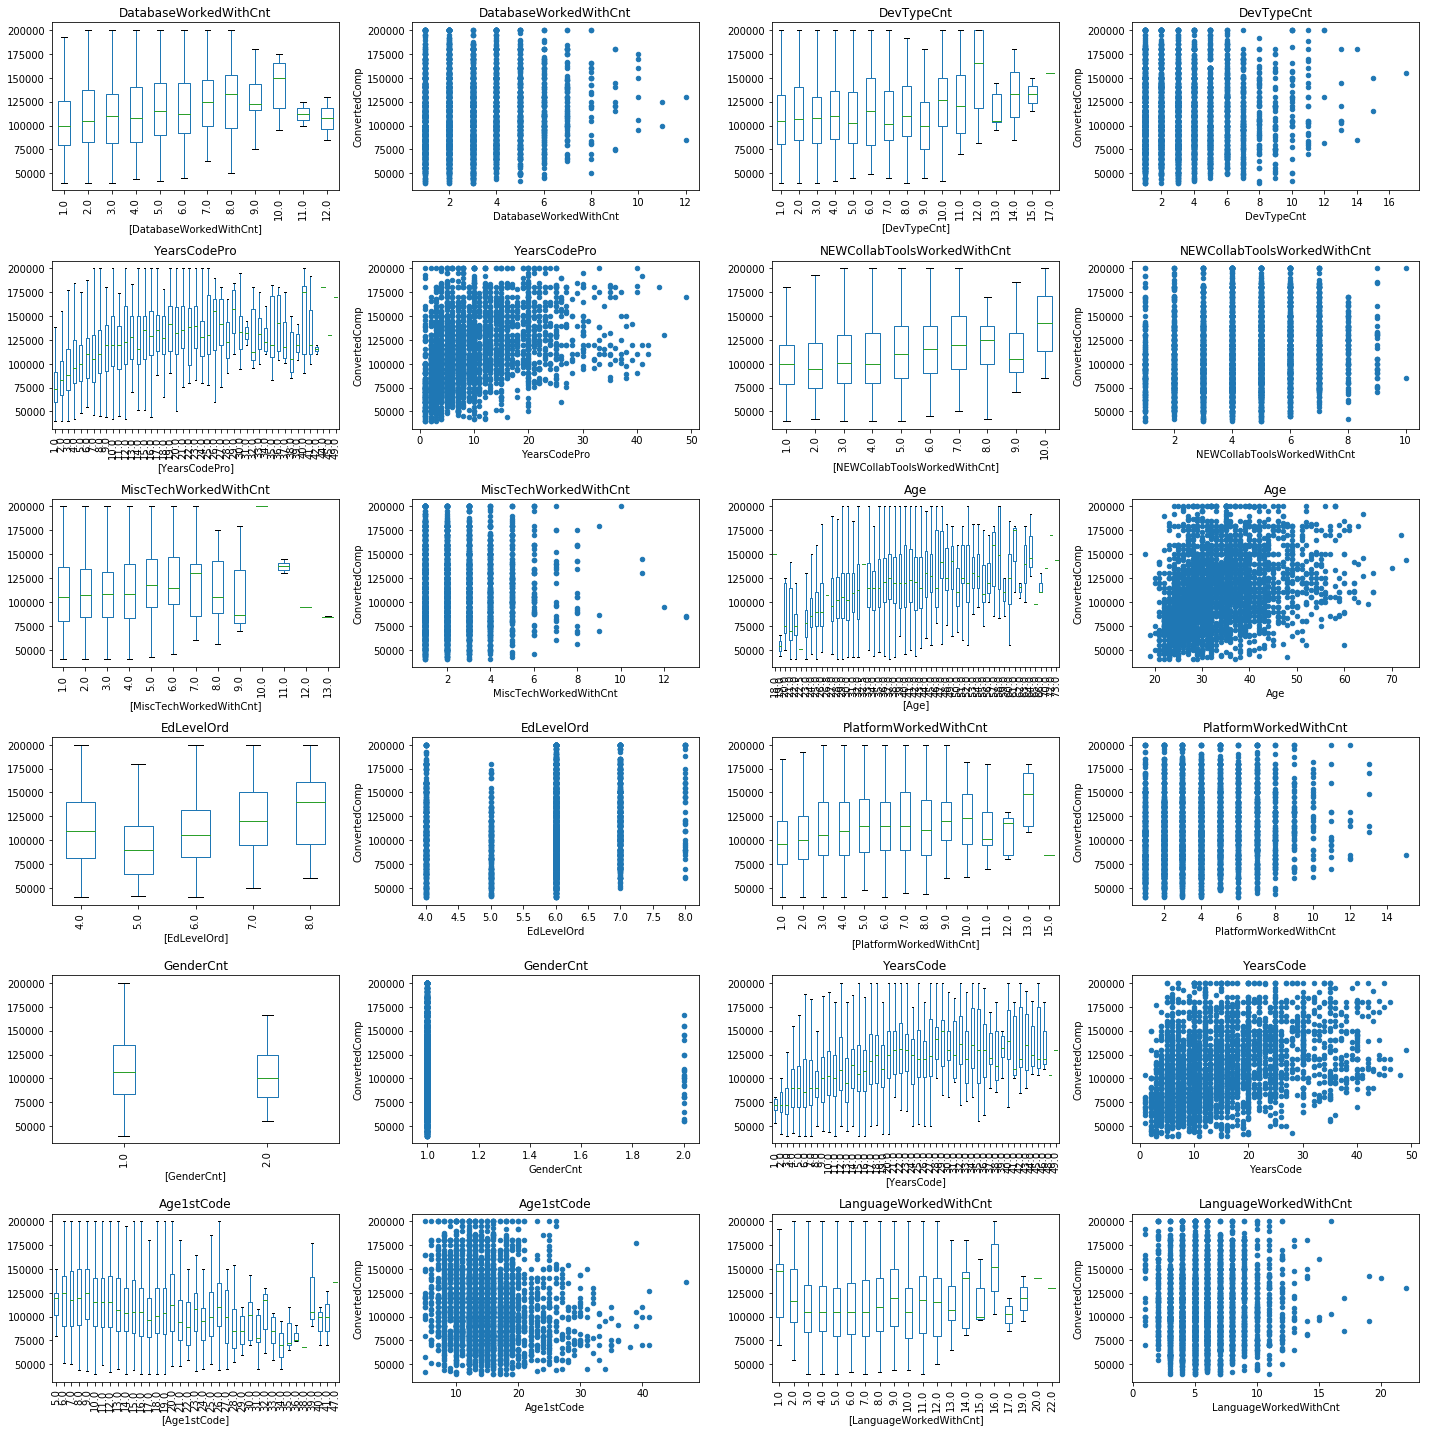

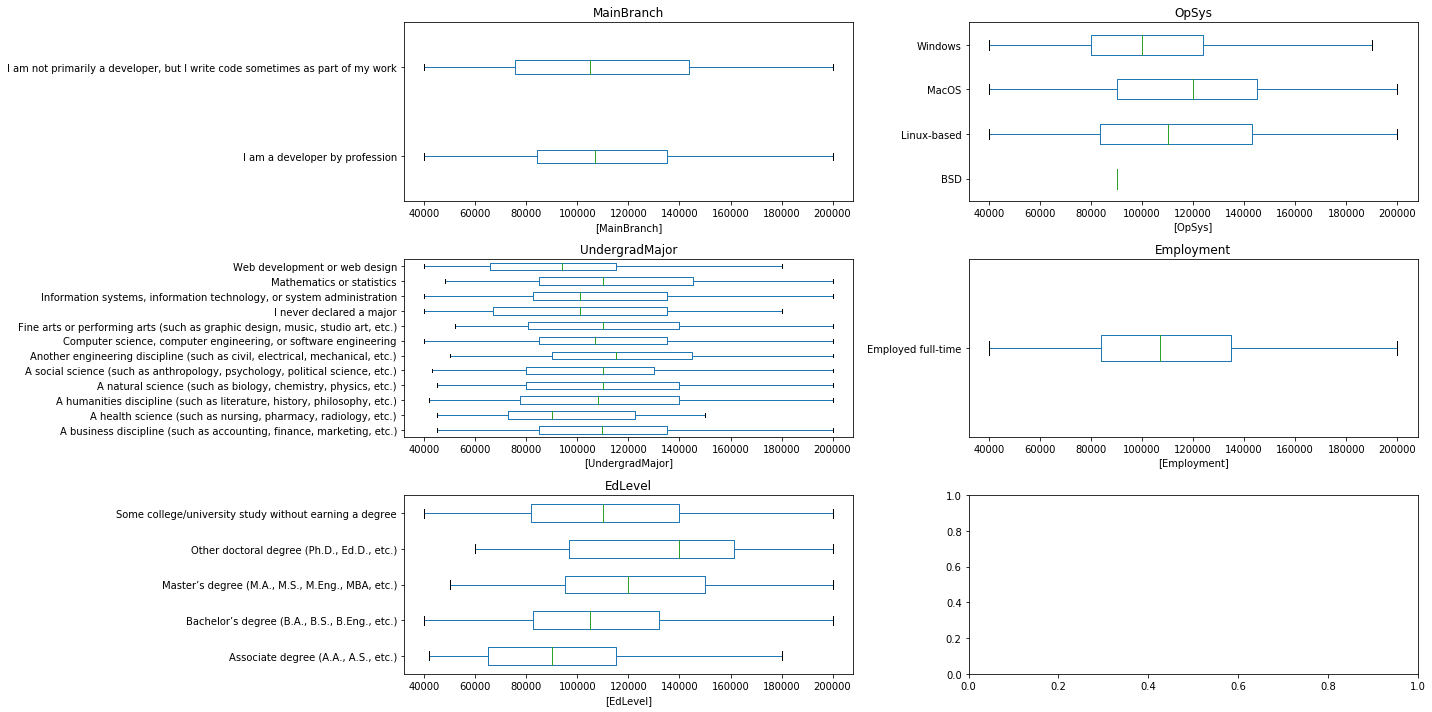

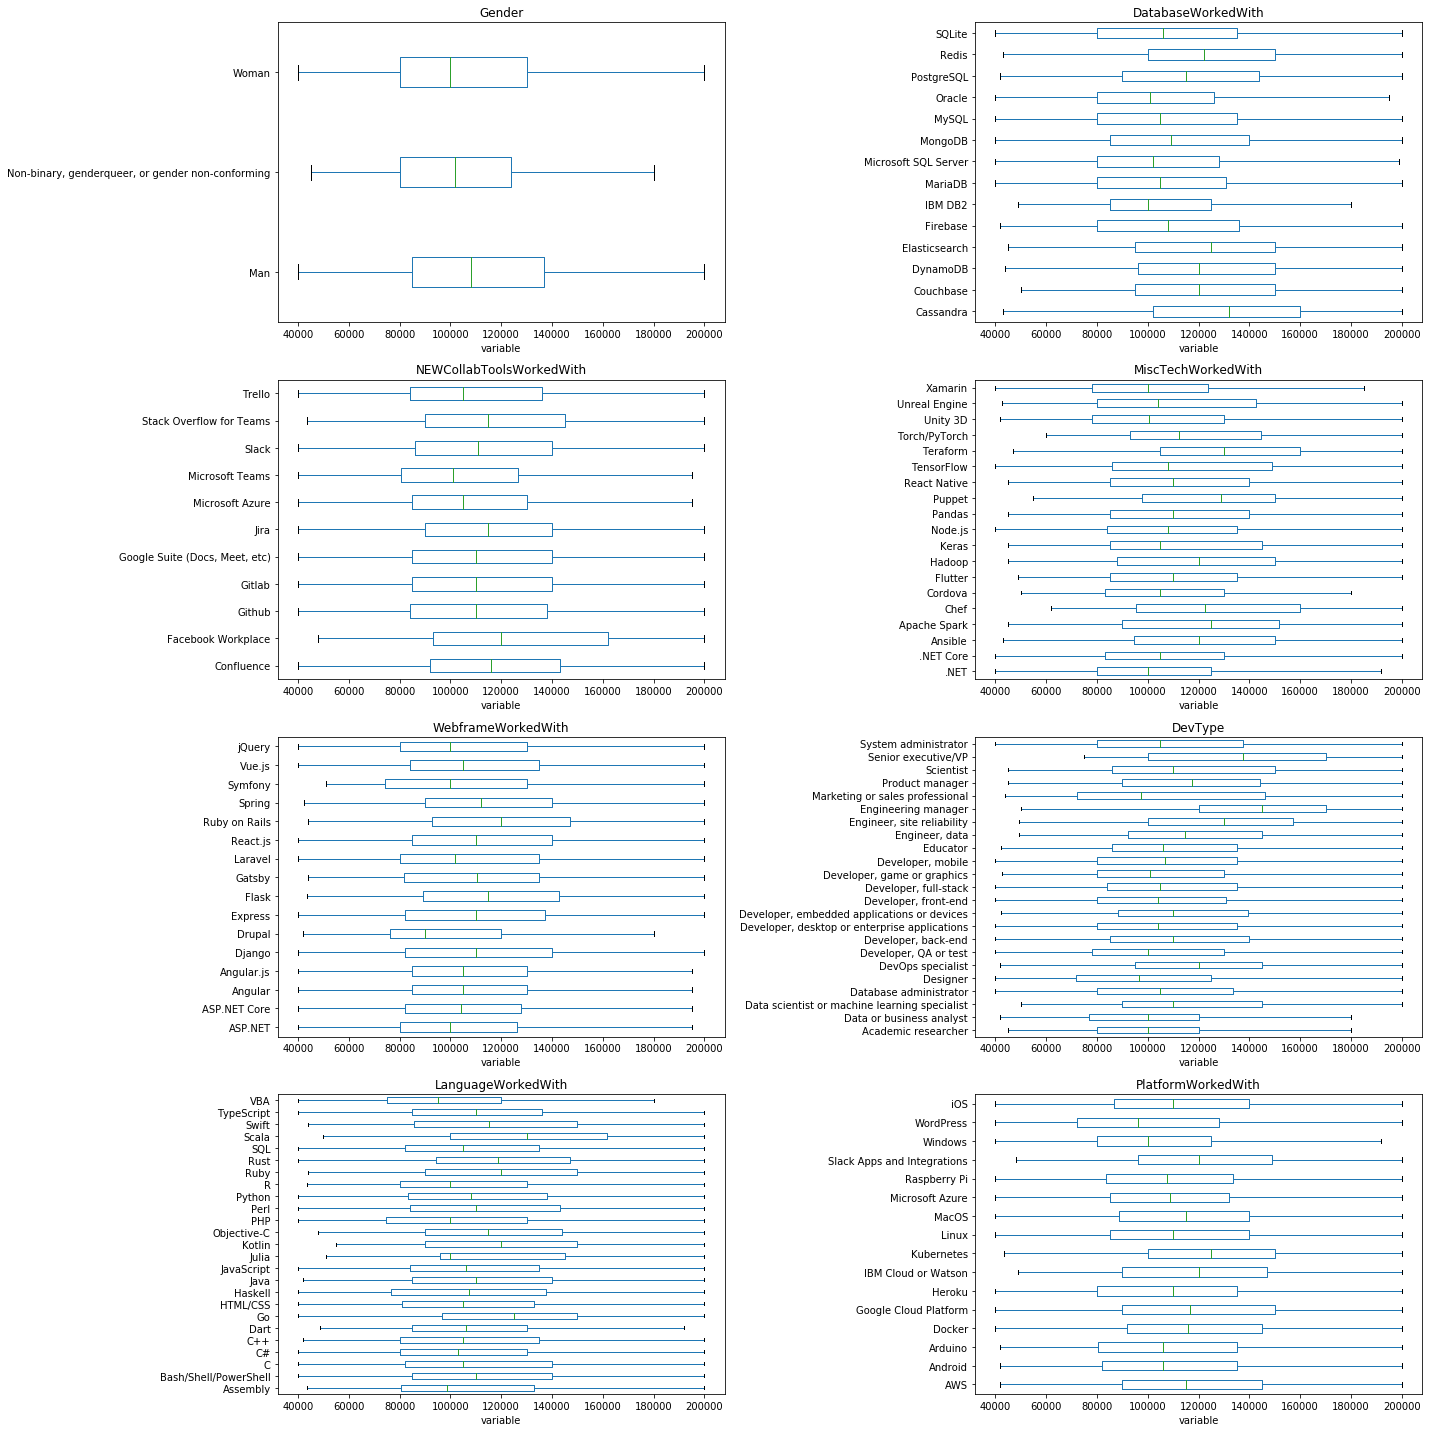

In [32]:
us=df[(df['Country']=='United States') & 
     (df['Employment']=='Employed full-time') &
     (df['ConvertedComp']<=200000) & 
     (df['ConvertedComp']>=40000)]
us_df=transform_data(us, numericals=all_numericals, categoricals=all_categoricals, multi_options=all_multi_options)
us_df[all_numericals+['ConvertedComp']].corr().style.background_gradient(cmap="summer")
run_model(us_df)

(6456, 69)
(3334, 160)


,DatabaseWorkedWithCnt,DevTypeCnt,EdLevelOrd,LanguageWorkedWithCnt,MiscTechWorkedWithCnt,NEWCollabToolsWorkedWithCnt,PlatformWorkedWithCnt,YearsCodePro,ConvertedComp
DatabaseWorkedWithCnt,1.000000,0.158940,-0.074535,0.385566,0.321699,0.293910,0.492674,0.005513,0.119673
DevTypeCnt,0.158940,1.000000,-0.093840,0.228363,0.196983,0.053521,0.218970,0.144016,0.049735
EdLevelOrd,-0.074535,-0.093840,1.000000,-0.045855,-0.000398,-0.022782,-0.055299,-0.032796,0.097324
LanguageWorkedWithCnt,0.385566,0.228363,-0.045855,1.000000,0.373225,0.182883,0.412911,-0.003966,0.028352
MiscTechWorkedWithCnt,0.321699,0.196983,-0.000398,0.373225,1.000000,0.201244,0.375201,-0.020121,0.055623
NEWCollabToolsWorkedWithCnt,0.293910,0.053521,-0.022782,0.182883,0.201244,1.000000,0.371315,-0.038902,0.163027
PlatformWorkedWithCnt,0.492674,0.218970,-0.055299,0.412911,0.375201,0.371315,1.000000,-0.000858,0.154558
YearsCodePro,0.005513,0.144016,-0.032796,-0.003966,-0.020121,-0.038902,-0.000858,1.000000,0.390341
ConvertedComp,0.119673,0.049735,0.097324,0.028352,0.055623,0.163027,0.154558,0.390341,1.000000


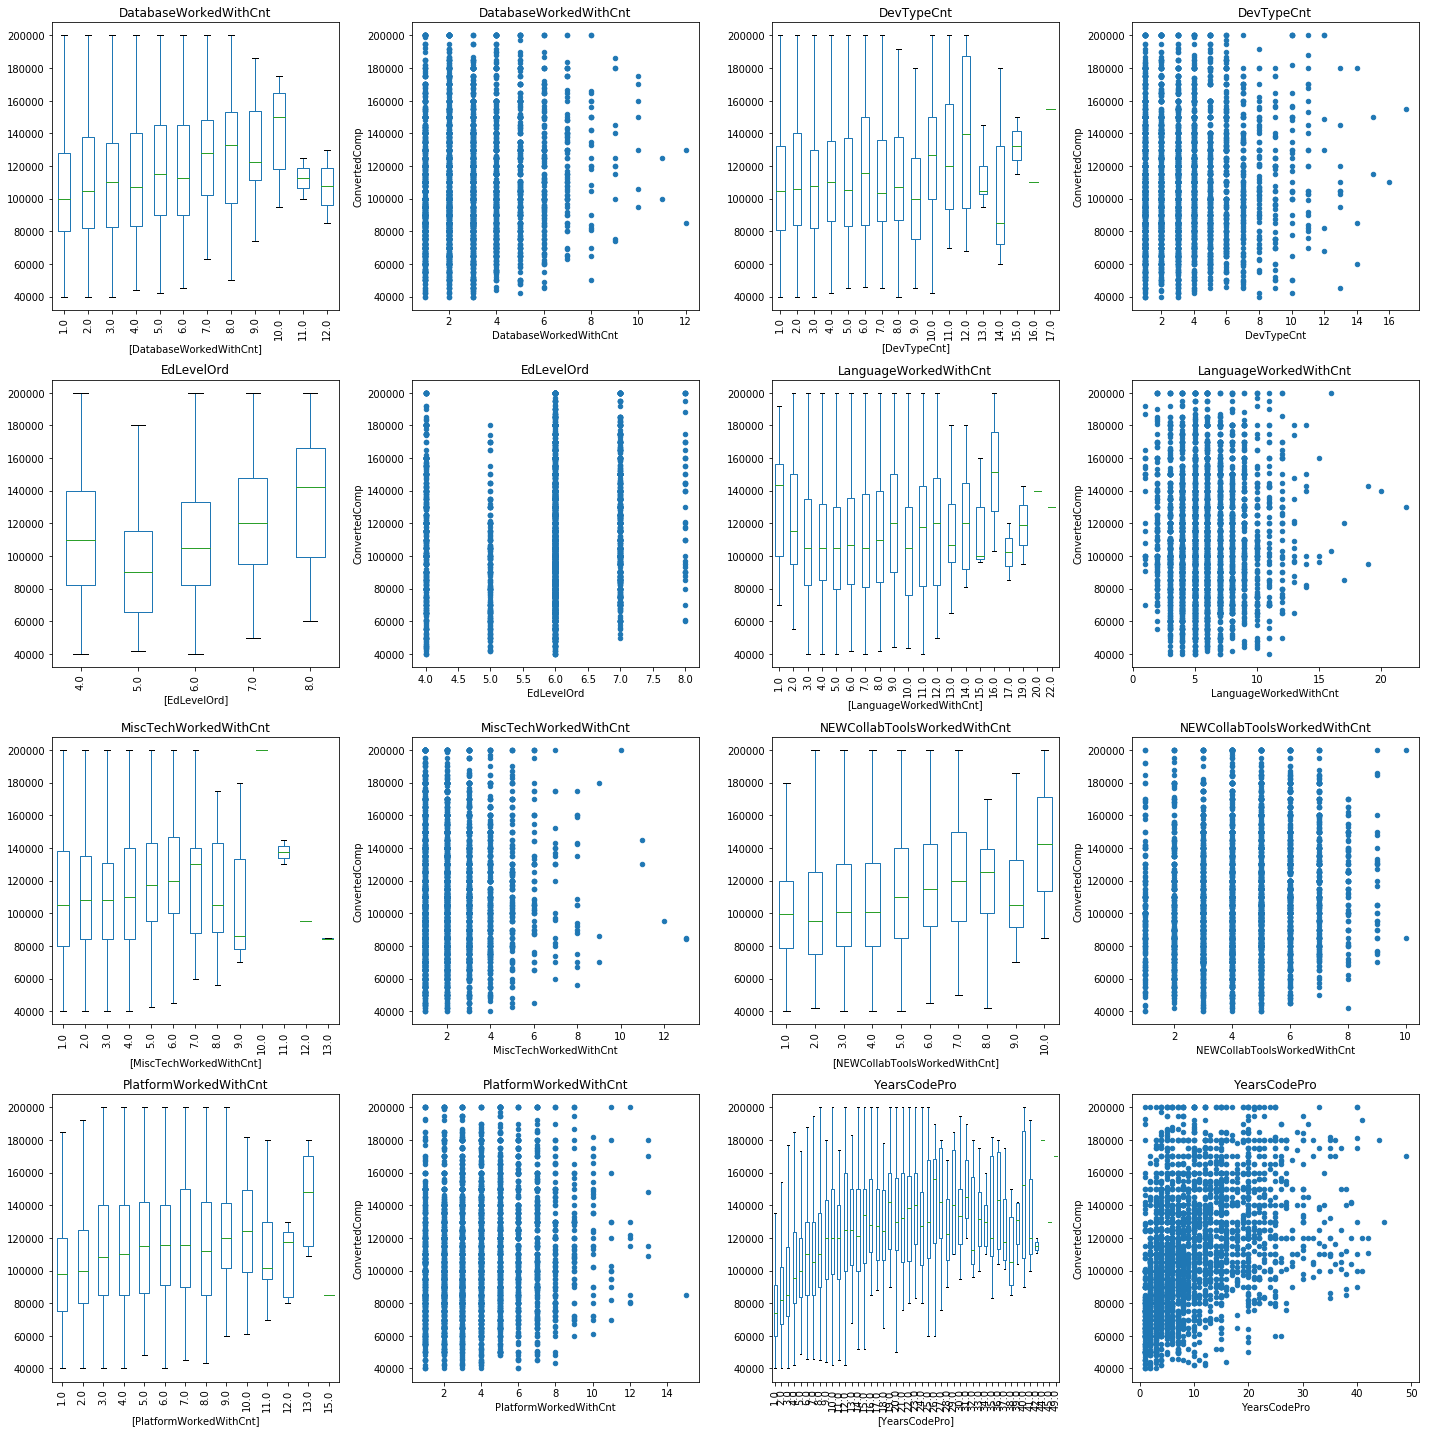

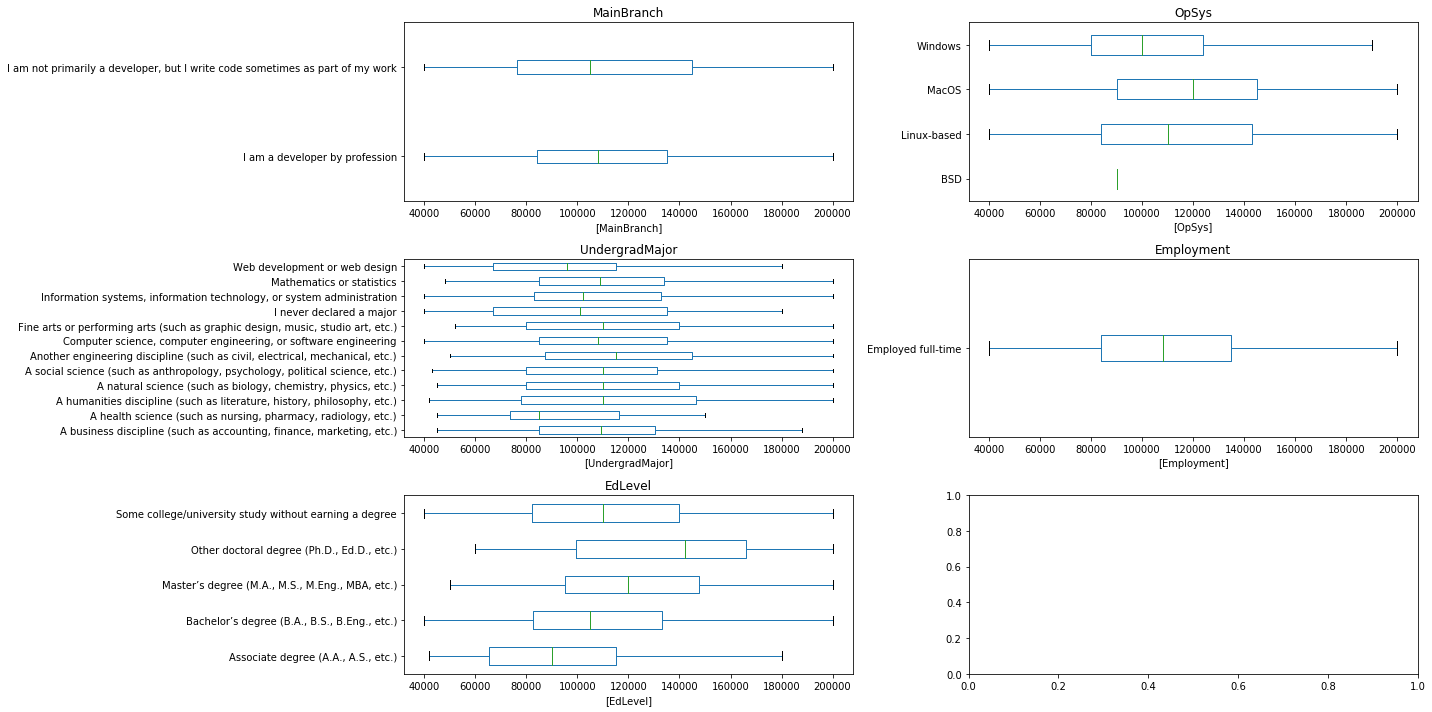

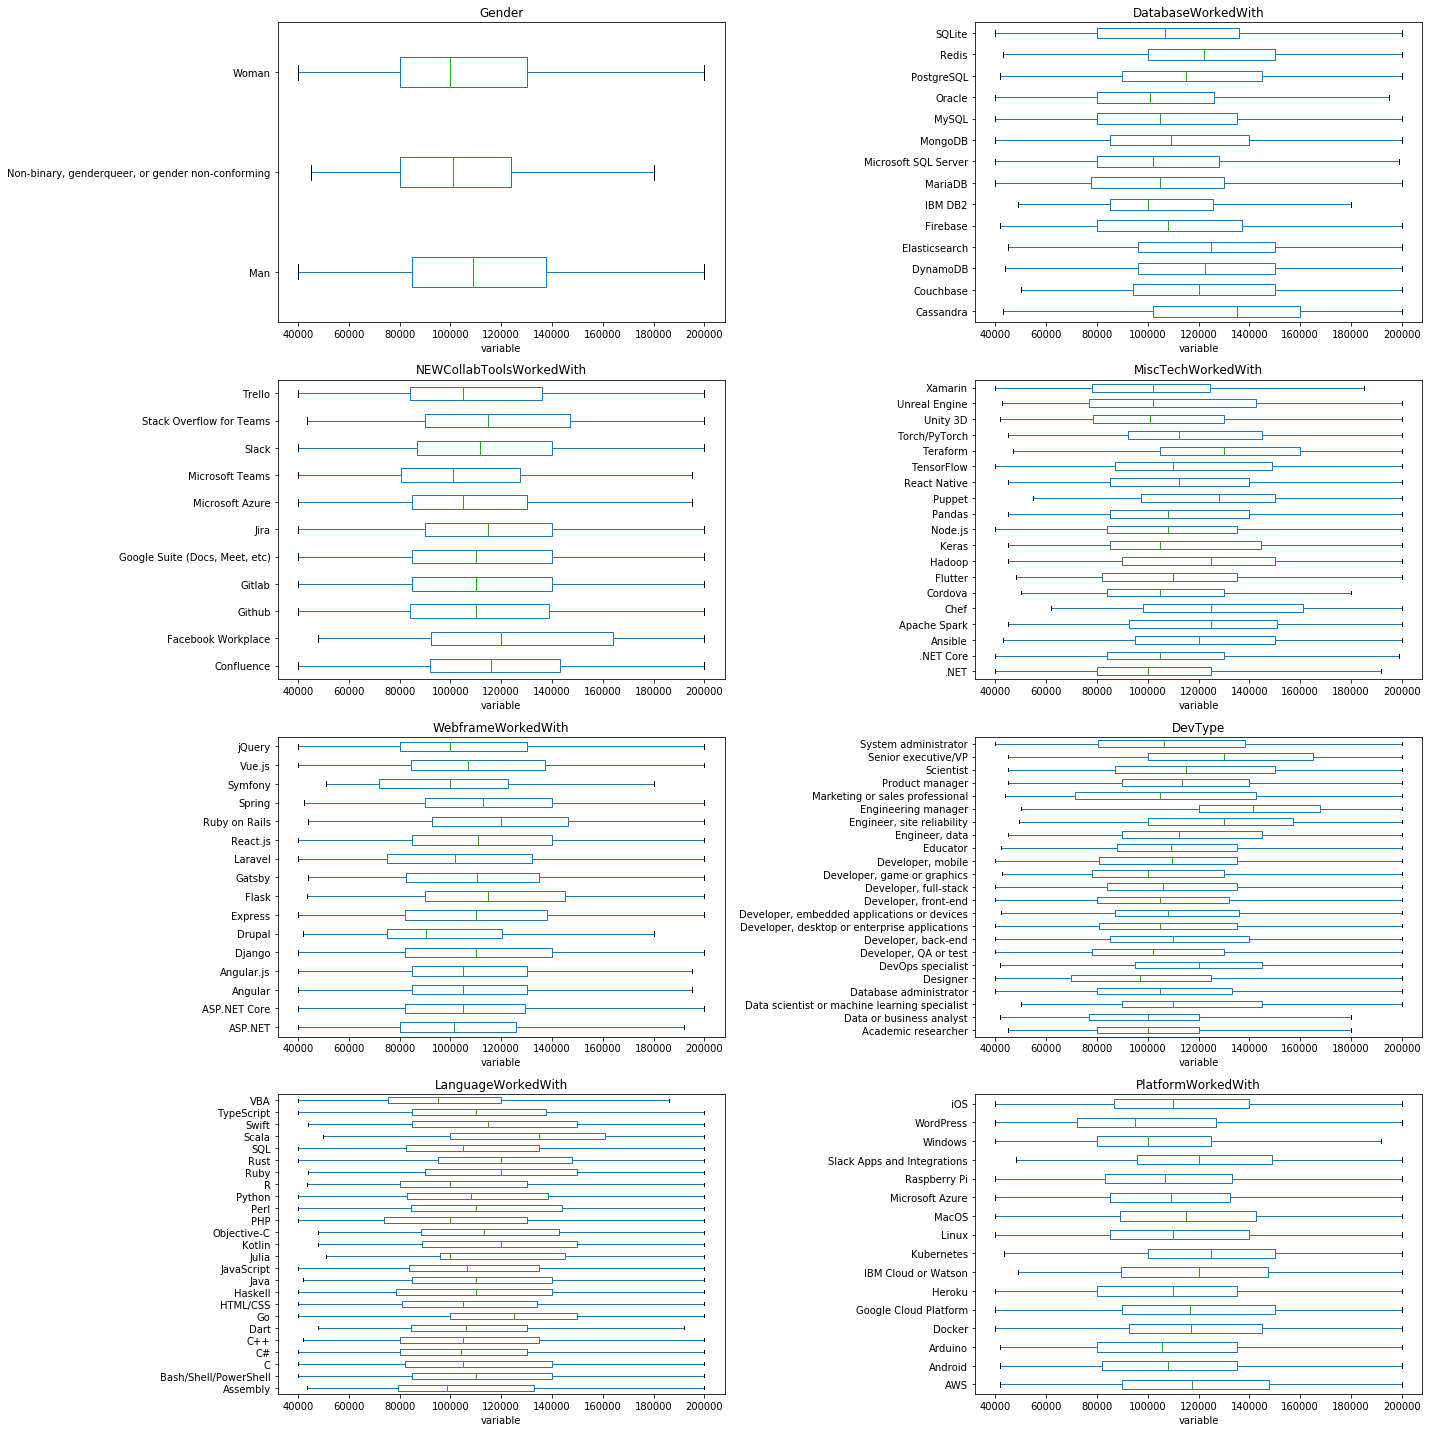

In [35]:
us=df[(df['Country']=='United States') & 
     (df['Employment']=='Employed full-time') &
     (df['ConvertedComp']<=200000) & 
     (df['ConvertedComp']>=40000)]
us_df_limited=transform_data(us, 
                     numericals=['DatabaseWorkedWithCnt',
                                 'DevTypeCnt',
                                 'EdLevelOrd',
                                 'LanguageWorkedWithCnt',
                                 'MiscTechWorkedWithCnt',
                                 'NEWCollabToolsWorkedWithCnt',
                                 'PlatformWorkedWithCnt',
                                 'YearsCodePro'], 
                     categoricals=all_categoricals, multi_options=all_multi_options)
us_df_limited[['DatabaseWorkedWithCnt',
      'DevTypeCnt',
      'EdLevelOrd',
      'LanguageWorkedWithCnt',
      'MiscTechWorkedWithCnt',
      'NEWCollabToolsWorkedWithCnt',
      'PlatformWorkedWithCnt',
      'YearsCodePro', 
      'ConvertedComp']].corr().style.background_gradient(cmap="summer")

In [36]:
run_model(us_df_limited)

(3334, 160) before trim
(3217, 159) after trim


/Users/kevinlee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RFR Train Score: 0.9120044269482057
RFR Test Score: 0.3802190096191339
LR Train Score: 0.4185187183025998
LR Test Score: -8.718777400984375e+22
[('YearsCodePro', 0.22434435878213443), ('Windows', 0.04108308229089572), ('Engineering manager', 0.029330960796383046), ('NEWCollabToolsWorkedWithCnt', 0.02487451023220257), ('LanguageWorkedWithCnt', 0.02168148856365677), ('Confluence', 0.0207151895972), ('DevTypeCnt', 0.020380110200811808), ('PlatformWorkedWithCnt', 0.019795840826800012), ('PHP', 0.016858516451275254), ('DatabaseWorkedWithCnt', 0.01638542540818443)]


In [38]:
clean_us=us_df_limited[(us_df_limited['PlatformWorkedWithCnt']<=10) & 
                  (us_df_limited['YearsCodePro']<=30) & 
                  (us_df_limited['NEWCollabToolsWorkedWithCnt']<10) & 
                  (us_df_limited['MiscTechWorkedWithCnt']<10) & 
                  (us_df_limited['LanguageWorkedWithCnt']<15) & 
                  (us_df_limited['DevTypeCnt']<12) & 
                  (us_df_limited['DatabaseWorkedWithCnt']<11)]

run_model(clean_us)

(3094, 160) before trim
(3094, 159) after trim


/Users/kevinlee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RFR Train Score: 0.9077265550891191
RFR Test Score: 0.37427844340110894
LR Train Score: 0.43327948393133764
LR Test Score: -1.0599356207553517e+21
[('YearsCodePro', 0.23280298924566842), ('Windows', 0.03367846415773617), ('LanguageWorkedWithCnt', 0.025869179510087298), ('NEWCollabToolsWorkedWithCnt', 0.024735198752131954), ('DevTypeCnt', 0.02078319536551108), ('PHP', 0.018912947845164396), ('PlatformWorkedWithCnt', 0.018289479472096002), ('MacOS', 0.01811804327208357), ('Engineering manager', 0.0173497760393276), ('DatabaseWorkedWithCnt', 0.016892968944989685)]


In [290]:
all_multi_options

['Gender',
 'DatabaseWorkedWith',
 'LanguageWorkedWith',
 'NEWCollabToolsWorkedWith',
 'DevType',
 'MiscTechWorkedWith',
 'WebframeWorkedWith',
 'PlatformWorkedWith']

(6456, 69)
(6379, 3)
(6379, 3) before trim
(6146, 2) after trim


/Users/kevinlee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RFR Train Score: 0.23955947874818828
RFR Test Score: 0.19245437556086975
LR Train Score: 0.1468359289261041
LR Test Score: 0.16054685931078805
[('YearsCodePro', 0.8434223734849468), ('EdLevelOrd', 0.15657762651505322)]


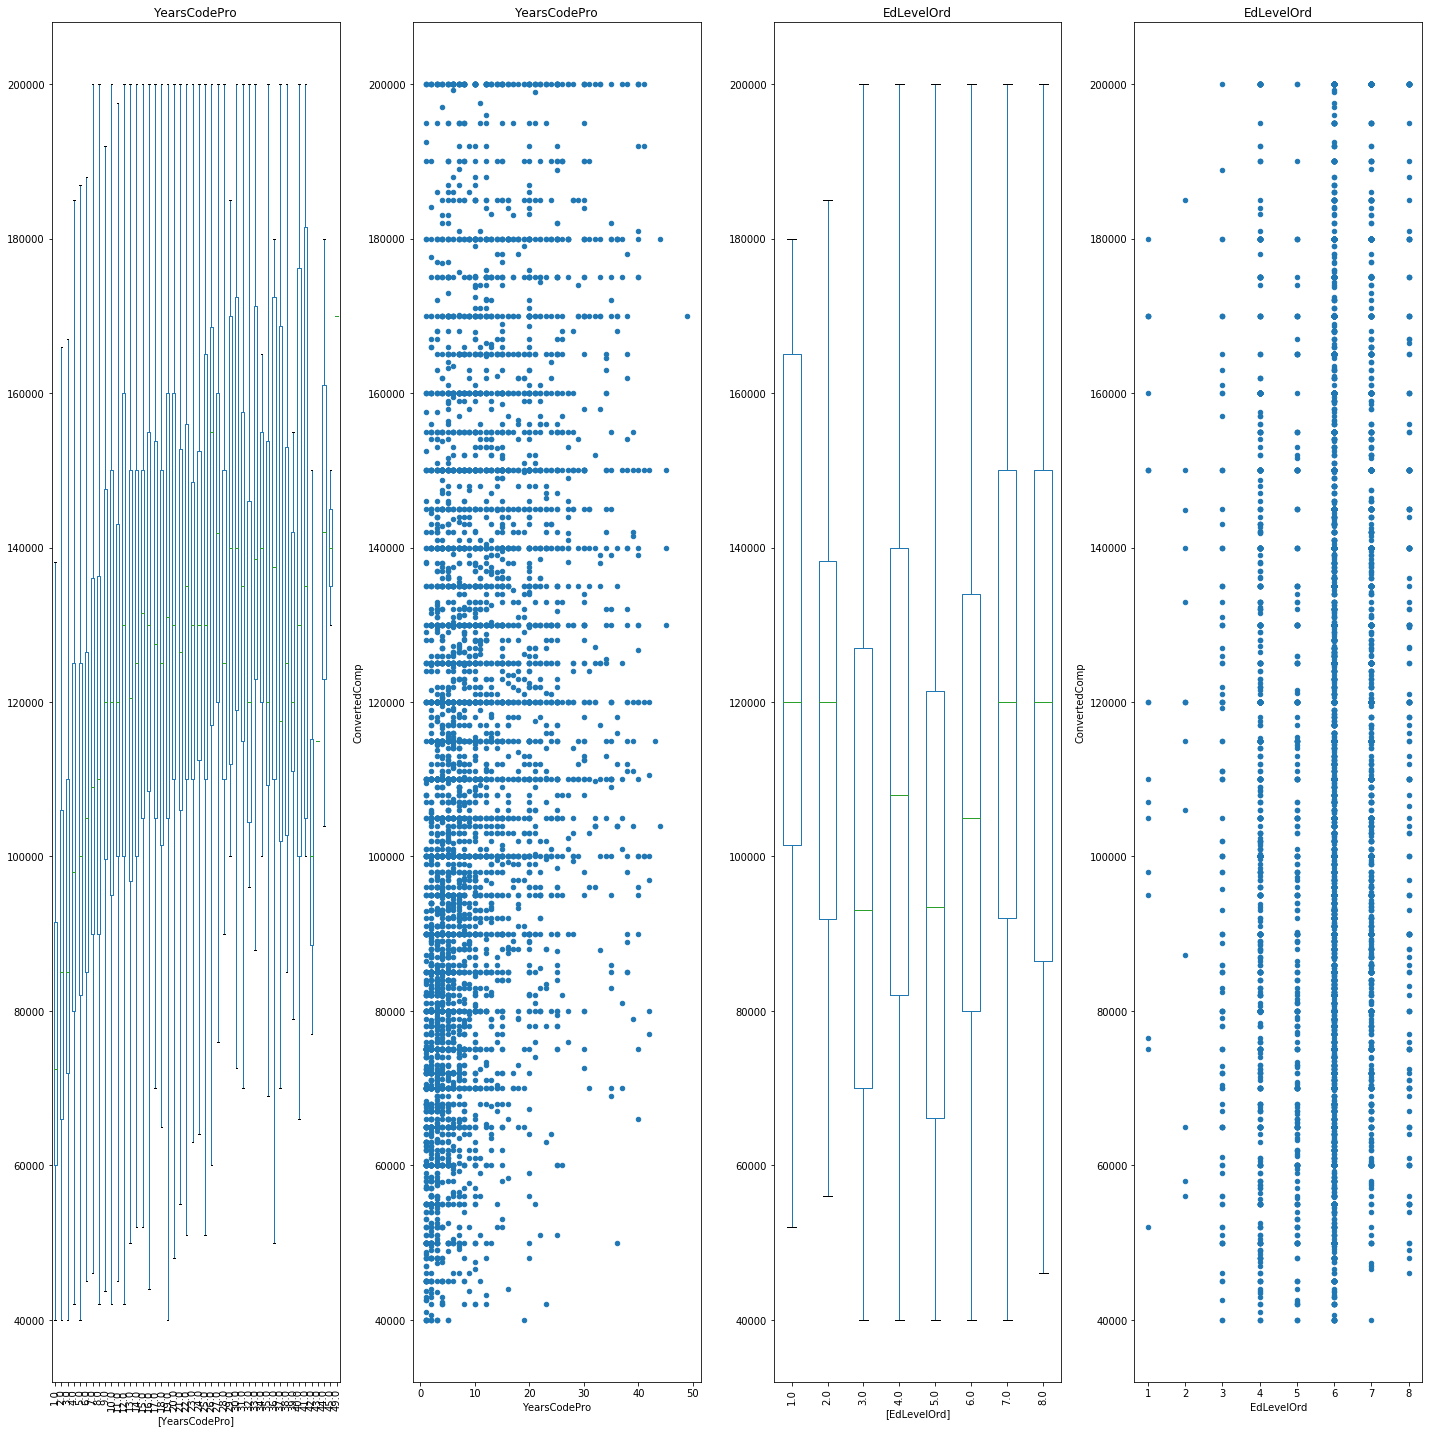

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

In [40]:
us=df[(df['Country']=='United States') & 
     (df['Employment']=='Employed full-time') &
     (df['ConvertedComp']<=200000) & 
     (df['ConvertedComp']>=40000)]
us_df=transform_data(us, numericals=['YearsCodePro', 'EdLevelOrd'], categoricals=[], multi_options=[])
us_df[['YearsCodePro', 'EdLevelOrd']+['ConvertedComp']].corr().style.background_gradient(cmap="summer")
run_model(us_df)

In [ ]:
us_df.count()

In [ ]:
india=df[(df['Country']=='India') & 
     (df['Employment']=='Employed full-time') &
     (df['ConvertedComp']<=200000)]
india_df_limited=transform_data(india, 
                                numericals=['DatabaseWorkedWithCnt',
                                'DevTypeCnt',
                                'EdLevelOrd',
                                'LanguageWorkedWithCnt',
                                'MiscTechWorkedWithCnt',
                                'NEWCollabToolsWorkedWithCnt',
                                'PlatformWorkedWithCnt',
                                'YearsCodePro'], 
                                categoricals=[], multi_options=all_multi_options)

In [ ]:
run_model(india_df_limited)

In [ ]:
us=df[(df['Country']=='United States') & 
     (df['Employment']=='Employed full-time') &
     (df['ConvertedComp']<=200000) & 
     (df['ConvertedComp']>=40000)]
us_df=transform_data(us, numericals=all_numericals, categoricals=['EdLevel'], multi_options=['DevType'])

In [211]:
run_model(all_df)

(18105, 167) before trim
(14661, 166) after trim


/Users/kevinlee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RFR Train Score: 0.8581067174305587
RFR Test Score: -0.057336209536370086
LR Train Score: 0.026990034722769285
LR Test Score: -0.011992607763891883
[('Age1stCode', 0.046654006979529886), ('YearsCode', 0.04081796685304275), ('Age', 0.040341000886901277), ('YearsCodePro', 0.03703446031330236), ('LanguageWorkedWithCnt', 0.030596835130569055), ('NEWCollabToolsWorkedWithCnt', 0.0302620834032834), ('DevTypeCnt', 0.030071775414799995), ('PlatformWorkedWithCnt', 0.028493709477544992), ('DatabaseWorkedWithCnt', 0.024847783531072216), ('MiscTechWorkedWithCnt', 0.01827703964569959)]


In [210]:
run_model(us_df)

(3526, 136) before trim
(3402, 135) after trim


/Users/kevinlee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RFR Train Score: 0.9112500685781817
RFR Test Score: 0.3435938950477818
LR Train Score: 0.40801212769479545
LR Test Score: 0.342314182838134
[('YearsCodePro', 0.23248780114866643), ('NEWCollabToolsWorkedWithCnt', 0.029903411360681097), ('LanguageWorkedWithCnt', 0.028246847149552043), ('Confluence', 0.026479229051443207), ('Windows', 0.024841177653819876), ('PlatformWorkedWithCnt', 0.022309774434133824), ('EdLevelOrd', 0.021186324146840338), ('DevTypeCnt', 0.020692780944601644), ('Teraform', 0.018452741410674784), ('DatabaseWorkedWithCnt', 0.01743548255252402)]


In [119]:
df['Country'].value_counts()

United States       12469
India                8403
United Kingdom       3896
Germany              3890
Canada               2191
                    ...  
Grenada                 1
Fiji                    1
Marshall Islands        1
Nauru                   1
Saint Lucia             1
Name: Country, Length: 183, dtype: int64

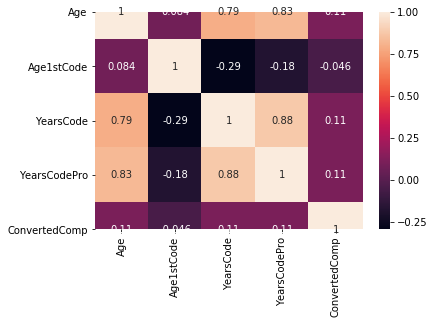

In [86]:
import seaborn as sns
sns.heatmap(X[numericals+['ConvertedComp']].corr(), annot=True)

In [29]:
X.columns

Index(['ConvertedComp', 'Age', 'Age1stCode', 'YearsCode', 'YearsCodePro',
       'I am a developer by profession',
       'I am a student who is learning to code',
       'I am not primarily a developer, but I write code sometimes as part of my work',
       'I code primarily as a hobby',
       'I used to be a developer by profession, but no longer am',
       ...
       'Express', 'Flask', 'Gatsby', 'Laravel', 'React.js', 'Ruby on Rails',
       'Spring', 'Symfony', 'Vue.js', 'jQuery'],
      dtype='object', length=352)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

columns=2

def run_model(X, all_numericals, all_categoricals, all_multi_options): 
    print(f'{X.shape} before trim')
    X=X[all_numericals+all_categoricals+all_multi_options+['ConvertedComp']]
    fig, ax=plt.subplots(math.ceil(len(all_numericals)/columns, columns))
    input_ary=X.dropna().drop('ConvertedComp', axis=1)
    y=X.dropna()['ConvertedComp']
    print(f'{X.shape} after trim')
    for idx, each_col in enumerate(all_numericals): 
        X[['ConvertedComp', each_col]].boxplot(by=each_col, showfliers=False, rot=90, ax=ax[int(idx/columns)][idx%columns])
    
#     for each_col in all_numericals: 
#         X[['ConvertedComp', each_col]].boxplot(by=each_col, showfliers=False, rot=90, figsize=(20, 10))
    
#     X_train, X_test, y_train, y_test=train_test_split(input_ary, y)
#     rfr=RandomForestRegressor()
#     rfr.fit(X_train, y_train)
#     print(f'RFR Train Score: {rfr.score(X_train, y_train)}')
#     print(f'RFR Test Score: {rfr.score(X_test, y_test)}')
#     lr=LinearRegression()
#     lr.fit(X_train, y_train)
#     print(f'LR Train Score: {lr.score(X_train, y_train)}')
#     print(f'LR Test Score: {lr.score(X_test, y_test)}')

# Testing

In [17]:
us=X[(X['United States']==1) & 
     (X['Employed full-time']==1) &
     (X['ConvertedComp']<=200000) & 
     (X['ConvertedComp']>=40000)]
run_model(us, ['YearsCodePro'], 
          ['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
           'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
           'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
           'Professional degree (JD, MD, etc.)',
           'Some college/university study without earning a degree',
           'Associate degree (A.A., A.S., etc.)',
           'Other doctoral degree (Ph.D., Ed.D., etc.)',
           'Primary/elementary school',
           'I never completed any formal education'], 
          ['Academic researcher', 'Data or business analyst',
           'Data scientist or machine learning specialist',
           'Database administrator', 'Designer', 'DevOps specialist',
           'Developer, QA or test', 'Developer, back-end',
           'Developer, desktop or enterprise applications',
           'Developer, embedded applications or devices', 'Developer, front-end',
           'Developer, full-stack', 'Developer, game or graphics',
           'Developer, mobile', 'Educator', 'Engineer, data',
           'Engineer, site reliability', 'Engineering manager',
           'Marketing or sales professional', 'Product manager', 'Scientist',
           'Senior executive/VP', 'System administrator'])

KeyError: 'United States'

(460, 352) before trim
(460, 34) after trim
RFR Train Score: 0.8043186742144954
RFR Test Score: -0.026844763314820108
LR Train Score: 0.3397003992048825
LR Test Score: 0.22770378560788254


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


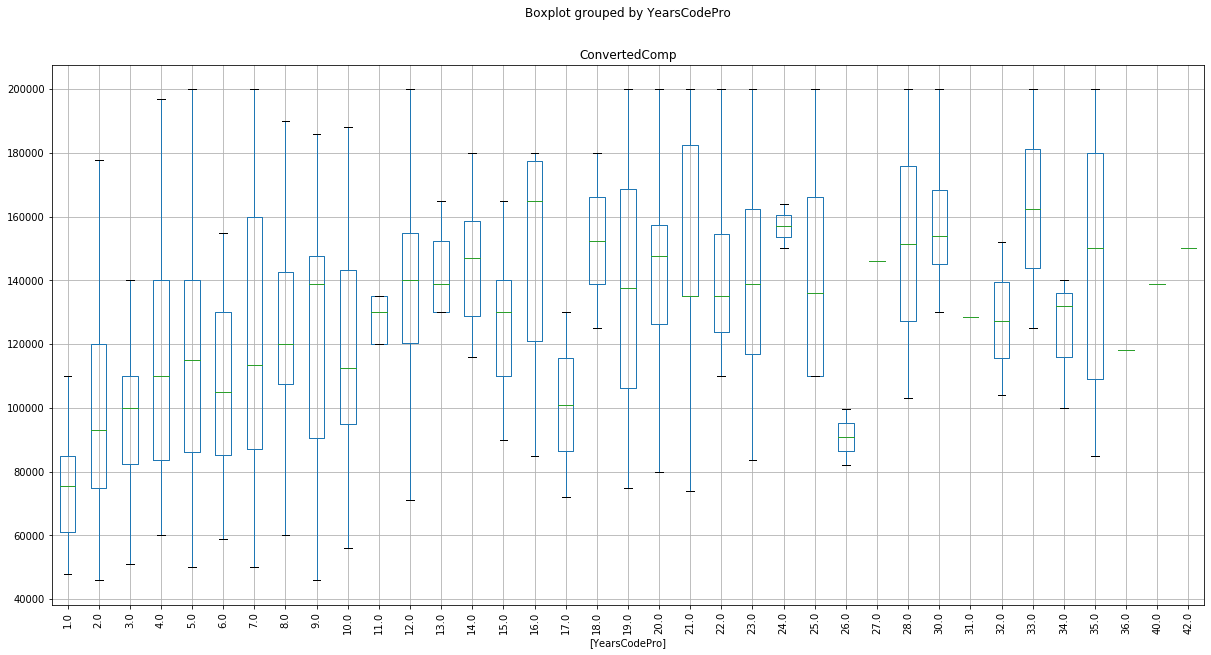

In [32]:
us=X[(X['United States']==1) & 
     (X['Employed full-time']==1) &
     (X['ConvertedComp']<=200000) & 
     (X['ConvertedComp']>=40000) & 
     (X['Data scientist or machine learning specialist']==1)]
run_model(us, ['YearsCodePro'], 
          ['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
           'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
           'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
           'Professional degree (JD, MD, etc.)',
           'Some college/university study without earning a degree',
           'Associate degree (A.A., A.S., etc.)',
           'Other doctoral degree (Ph.D., Ed.D., etc.)',
           'Primary/elementary school',
           'I never completed any formal education'], 
          ['Academic researcher', 'Data or business analyst',
           'Data scientist or machine learning specialist',
           'Database administrator', 'Designer', 'DevOps specialist',
           'Developer, QA or test', 'Developer, back-end',
           'Developer, desktop or enterprise applications',
           'Developer, embedded applications or devices', 'Developer, front-end',
           'Developer, full-stack', 'Developer, game or graphics',
           'Developer, mobile', 'Educator', 'Engineer, data',
           'Engineer, site reliability', 'Engineering manager',
           'Marketing or sales professional', 'Product manager', 'Scientist',
           'Senior executive/VP', 'System administrator'])

(879, 352) before trim
(879, 12) after trim
RFR Train Score: 0.43589246422666106
RFR Test Score: 0.08518292824047946
LR Train Score: 0.21111014808151263
LR Test Score: 0.22023128185205076


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


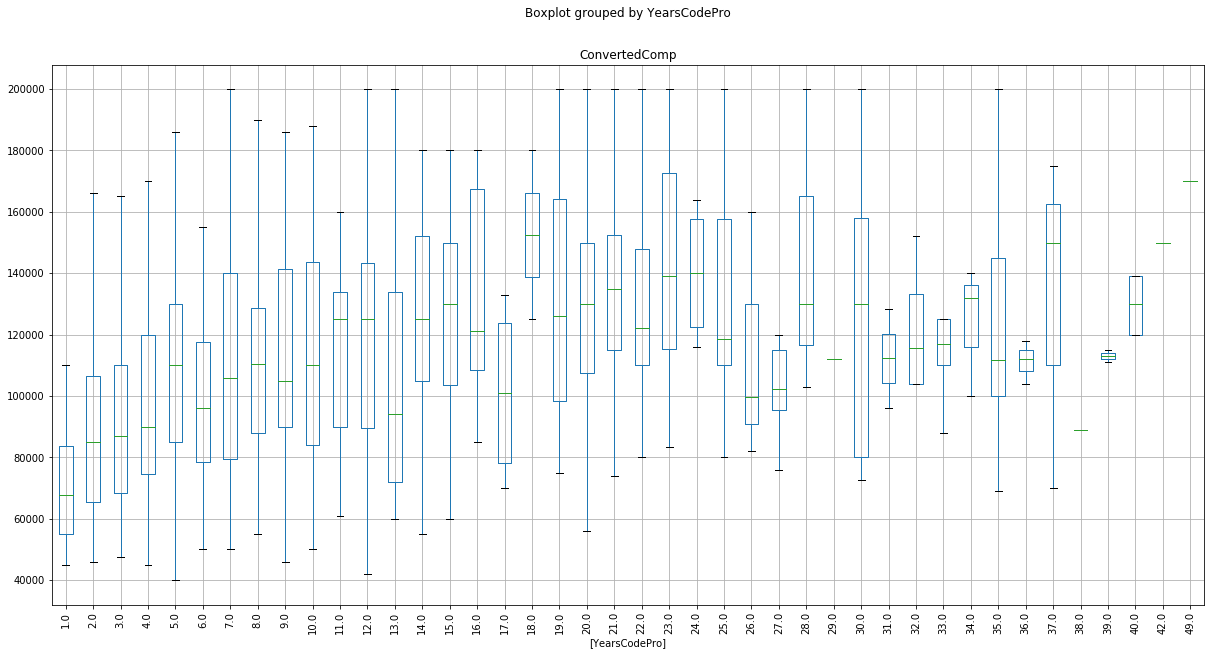

In [33]:
us=X[(X['United States']==1) & 
     (X['Employed full-time']==1) &
     (X['ConvertedComp']<=200000) &
     (X['ConvertedComp']>=40000) &
     ((X['Data scientist or machine learning specialist']==1) | 
     (X['Data or business analyst']==1))]
run_model(us, ['YearsCodePro'], 
          ['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
           'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
           'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
           'Professional degree (JD, MD, etc.)',
           'Some college/university study without earning a degree',
           'Associate degree (A.A., A.S., etc.)',
           'Other doctoral degree (Ph.D., Ed.D., etc.)',
           'Primary/elementary school',
           'I never completed any formal education'], 
          ['Data scientist or machine learning specialist'])

(6456, 352) before trim
(6456, 34) after trim
RFR Train Score: 0.6996942621530132
RFR Test Score: 0.09439868706517052
LR Train Score: 0.2463359088018966
LR Test Score: 0.2330257557531069


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


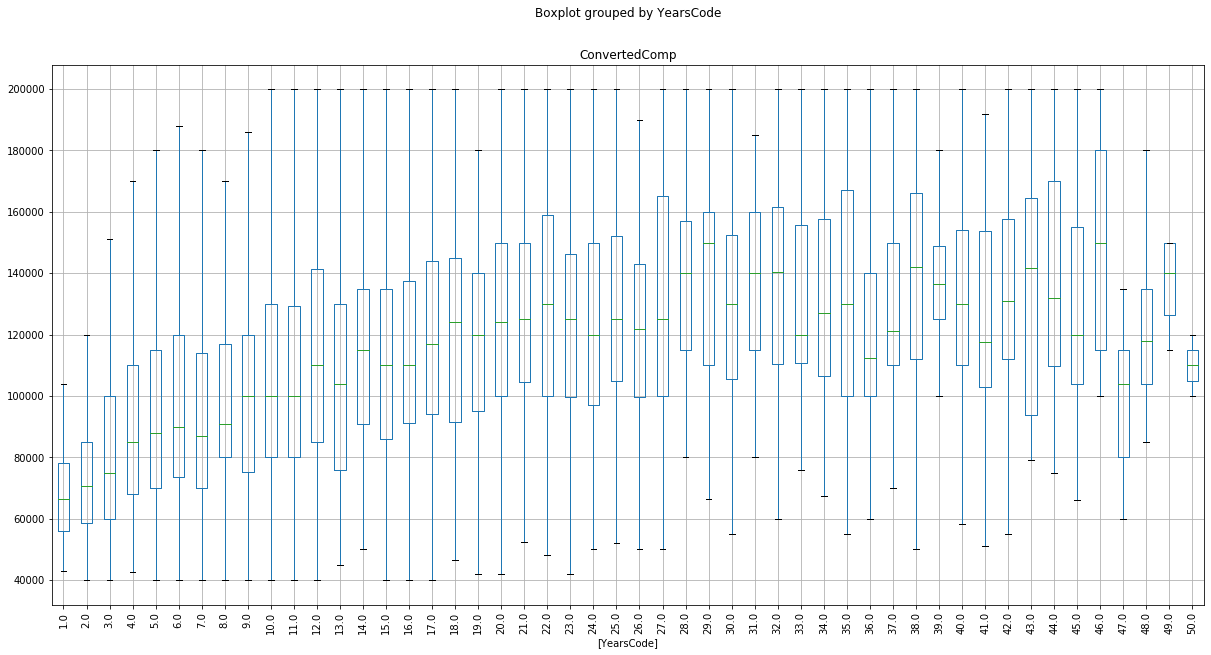

In [81]:
us=X[(X['United States']==1) & 
     (X['Employed full-time']==1) &
     (X['ConvertedComp']<=200000) & 
     (X['ConvertedComp']>=40000)]
run_model(us, ['YearsCode'], 
          ['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
           'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
           'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
           'Professional degree (JD, MD, etc.)',
           'Some college/university study without earning a degree',
           'Associate degree (A.A., A.S., etc.)',
           'Other doctoral degree (Ph.D., Ed.D., etc.)',
           'Primary/elementary school',
           'I never completed any formal education'], 
          ['Academic researcher', 'Data or business analyst',
           'Data scientist or machine learning specialist',
           'Database administrator', 'Designer', 'DevOps specialist',
           'Developer, QA or test', 'Developer, back-end',
           'Developer, desktop or enterprise applications',
           'Developer, embedded applications or devices', 'Developer, front-end',
           'Developer, full-stack', 'Developer, game or graphics',
           'Developer, mobile', 'Educator', 'Engineer, data',
           'Engineer, site reliability', 'Engineering manager',
           'Marketing or sales professional', 'Product manager', 'Scientist',
           'Senior executive/VP', 'System administrator'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


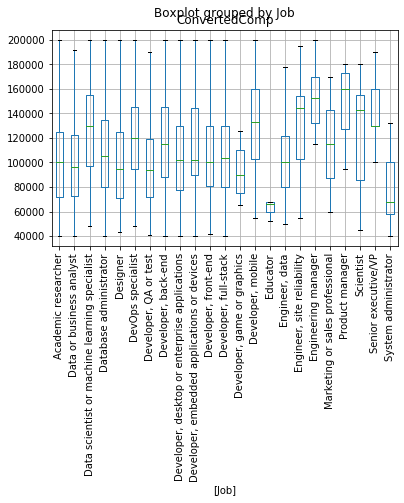

In [35]:
us=X[(X['United States']==1) & 
     (X['Employed full-time']==1) &
     (X['ConvertedComp']<=200000) & 
     (X['ConvertedComp']>=40000)]
# run_model(us, ['Age'], 
#           ['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
#            'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
#            'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
#            'Professional degree (JD, MD, etc.)',
#            'Some college/university study without earning a degree',
#            'Associate degree (A.A., A.S., etc.)',
#            'Other doctoral degree (Ph.D., Ed.D., etc.)',
#            'Primary/elementary school',
#            'I never completed any formal education'], 
#           ['Academic researcher', 'Data or business analyst',
#            'Data scientist or machine learning specialist',
#            'Database administrator', 'Designer', 'DevOps specialist',
#            'Developer, QA or test', 'Developer, back-end',
#            'Developer, desktop or enterprise applications',
#            'Developer, embedded applications or devices', 'Developer, front-end',
#            'Developer, full-stack', 'Developer, game or graphics',
#            'Developer, mobile', 'Educator', 'Engineer, data',
#            'Engineer, site reliability', 'Engineering manager',
#            'Marketing or sales professional', 'Product manager', 'Scientist',
#            'Senior executive/VP', 'System administrator'])
us['Job']=us[['Academic researcher', 'Data or business analyst',
           'Data scientist or machine learning specialist',
           'Database administrator', 'Designer', 'DevOps specialist',
           'Developer, QA or test', 'Developer, back-end',
           'Developer, desktop or enterprise applications',
           'Developer, embedded applications or devices', 'Developer, front-end',
           'Developer, full-stack', 'Developer, game or graphics',
           'Developer, mobile', 'Educator', 'Engineer, data',
           'Engineer, site reliability', 'Engineering manager',
           'Marketing or sales professional', 'Product manager', 'Scientist',
           'Senior executive/VP', 'System administrator']].idxmax(axis=1)
us[['Job', 'ConvertedComp']].boxplot(by='Job', showfliers=False, rot=90)

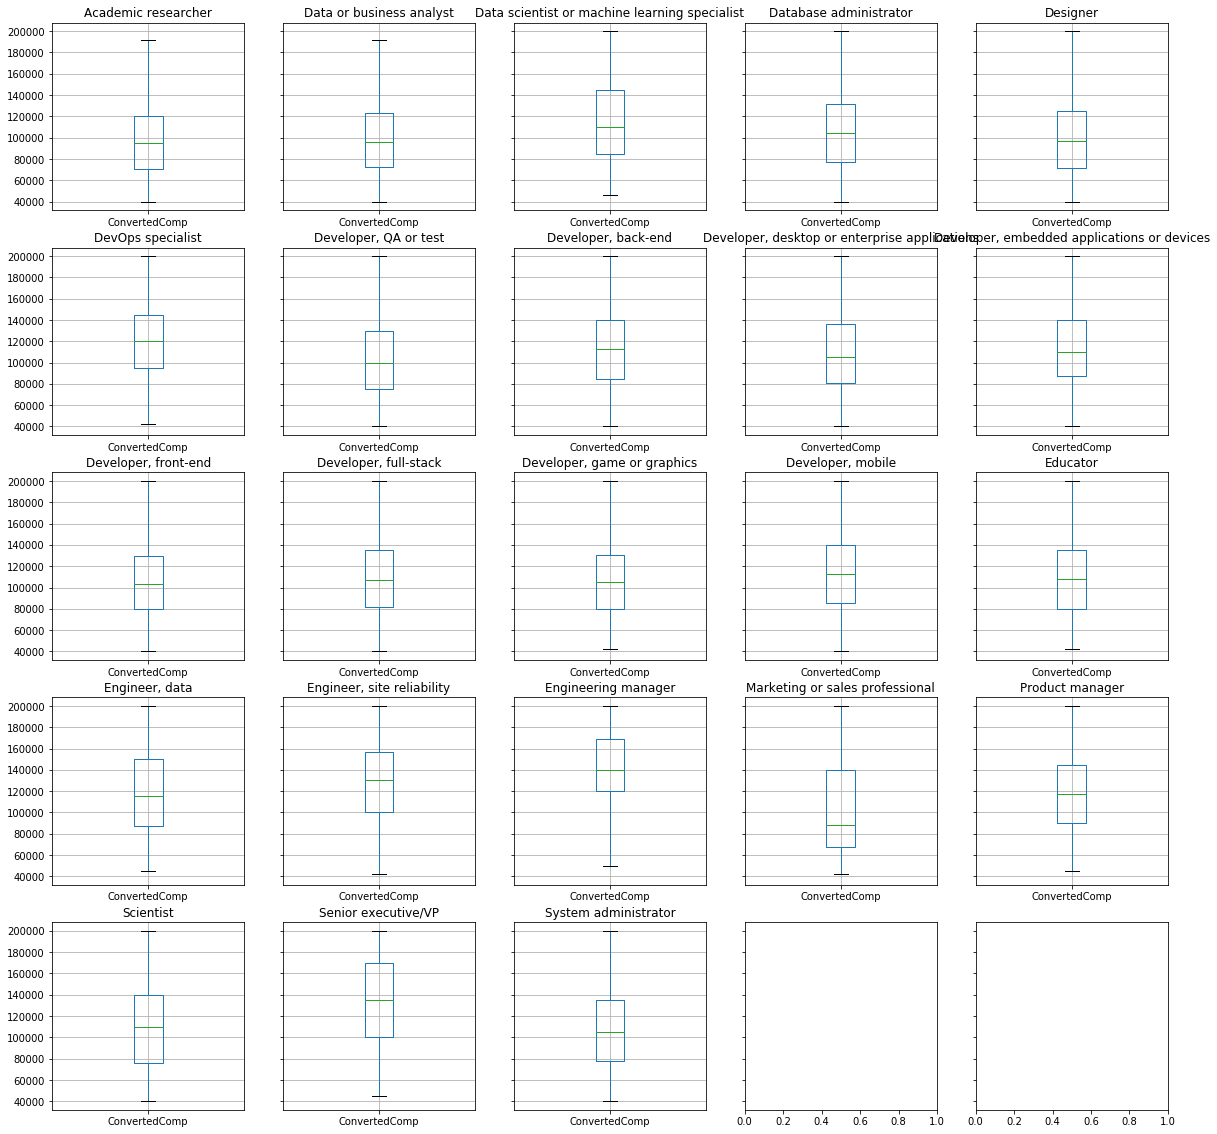

In [36]:
titles=['Academic researcher', 'Data or business analyst',
       'Data scientist or machine learning specialist',
       'Database administrator', 'Designer', 'DevOps specialist',
       'Developer, QA or test', 'Developer, back-end',
       'Developer, desktop or enterprise applications',
       'Developer, embedded applications or devices', 'Developer, front-end',
       'Developer, full-stack', 'Developer, game or graphics',
       'Developer, mobile', 'Educator', 'Engineer, data',
       'Engineer, site reliability', 'Engineering manager',
       'Marketing or sales professional', 'Product manager', 'Scientist',
       'Senior executive/VP', 'System administrator']
columns=5
fig, ax=plt.subplots(math.ceil(len(titles)/columns), columns, figsize=(20, 20), sharey=True)
for idx, each_title in enumerate(titles):
    us[us[each_title]==1][['ConvertedComp']].boxplot(showfliers=False, ax=ax[int(idx/columns)][idx%columns])
    ax[int(idx/columns)][idx%columns].set_title(each_title)
#     plt.show()

# Testing

['Age', 'Age1stCode', 'YearsCode', 'YearsCodePro']

['MainBranch', 'Country', 'EdLevel', 'Employment', 'OpSys', 'UndergradMajor']

['DatabaseWorkedWith', 'DevType', 'Gender', 'LanguageWorkedWith', 'MiscTechWorkedWith', 'NEWCollabToolsWorkedWith', 'PlatformWorkedWith', 'WebframeWorkedWith']

In [108]:
# print(numericals)
numericals=['Age', 'Age1stCode', 'YearsCode', 'YearsCodePro']
# numericals=['YearsCodePro']
# print(categoricals)
categoricals=['MainBranch', 'Country', 'EdLevel', 'Employment', 'OpSys', 'UndergradMajor']
# categoricals=['EdLevel']
# print(multi_options)
multi_options=['DatabaseWorkedWith', 'DevType', 'Gender', 'LanguageWorkedWith', 'MiscTechWorkedWith', 'NEWCollabToolsWorkedWith', 'PlatformWorkedWith', 'WebframeWorkedWith']
# multi_options=['DatabaseWorkedWith', 'DevType', 'LanguageWorkedWith', 'MiscTechWorkedWith', 'NEWCollabToolsWorkedWith', 'PlatformWorkedWith', 'WebframeWorkedWith']

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

def test_features(numericals, categoricals, multi_options):    
    X=df[(df['ConvertedComp']<=500000) & (df['ConvertedComp']>=10000) & (df['Employment']=='Employed full-time')]#[['ConvertedComp']]
    X=X[X['Country']=='United States'][['ConvertedComp']]
#     X=X[['ConvertedComp']]
    for each_col in numericals:
        X=pd.concat([X, pd.to_numeric(df[each_col], errors='coerce')], axis=1)
    for each_col in categoricals: 
        X=pd.concat([X, pd.get_dummies(df[each_col])], axis=1)
    for each_col in multi_options: 
        X=pd.concat([X, df[each_col].str.get_dummies(sep=';')], axis=1)    
    input_ary=X.dropna().drop('ConvertedComp', axis=1)
    y=X.dropna()['ConvertedComp']
    print(input_ary.shape)
    print(sorted(input_ary.columns))
    X_train, X_test, y_train, y_test=train_test_split(input_ary, y)
    rfr=RandomForestRegressor()
    rfr.fit(X_train, y_train)
    print(f'LR Train Score: {rfr.score(X_train, y_train)}')
    print(f'LR Test Score: {rfr.score(X_test, y_test)}')
    lr=LinearRegression()
    # input_ary=X.dropna()[['YearsCodePro']]
    # y=X.dropna()['ConvertedComp']
#     X_train, X_test, y_train, y_test=train_test_split(input_ary, y)
    lr.fit(input_ary, y)
    lr.score(input_ary, y)
    print(f'LR Train Score: {lr.score(X_train, y_train)}')
    print(f'LR Test Score: {lr.score(X_test, y_test)}')

In [38]:
# print(numericals)
# numericals=['Age', 'Age1stCode', 'YearsCode', 'YearsCodePro']
numericals=['YearsCodePro']
# print(categoricals)
# categoricals=['MainBranch', 'Country', 'EdLevel', 'Employment', 'OpSys', 'UndergradMajor']
categoricals=['EdLevel']
# print(multi_options)
# multi_options=['DatabaseWorkedWith', 'DevType', 'Gender', 'LanguageWorkedWith', 'MiscTechWorkedWith', 'NEWCollabToolsWorkedWith', 'PlatformWorkedWith', 'WebframeWorkedWith']
multi_options=['DatabaseWorkedWith', 'DevType', 'LanguageWorkedWith', 'MiscTechWorkedWith', 'NEWCollabToolsWorkedWith', 'PlatformWorkedWith', 'WebframeWorkedWith']
test_features(numericals, categoricals, multi_options)

(25379, 134)
['.NET', '.NET Core', 'ASP.NET', 'ASP.NET Core', 'AWS', 'Academic researcher', 'Android', 'Angular', 'Angular.js', 'Ansible', 'Apache Spark', 'Arduino', 'Assembly', 'Associate degree (A.A., A.S., etc.)', 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', 'Bash/Shell/PowerShell', 'C', 'C#', 'C++', 'Cassandra', 'Chef', 'Confluence', 'Cordova', 'Couchbase', 'Dart', 'Data or business analyst', 'Data scientist or machine learning specialist', 'Database administrator', 'Designer', 'DevOps specialist', 'Developer, QA or test', 'Developer, back-end', 'Developer, desktop or enterprise applications', 'Developer, embedded applications or devices', 'Developer, front-end', 'Developer, full-stack', 'Developer, game or graphics', 'Developer, mobile', 'Django', 'Docker', 'Drupal', 'DynamoDB', 'Educator', 'Elasticsearch', 'Engineer, data', 'Engineer, site reliability', 'Engineering manager', 'Express', 'Facebook Workplace', 'Firebase', 'Flask', 'Flutter', 'Gatsby', 'Github', 'Gitlab', 'Go', '

In [39]:
# print(numericals)
# numericals=['Age', 'Age1stCode', 'YearsCode', 'YearsCodePro']
numericals=['YearsCodePro']
# print(categoricals)
# categoricals=['MainBranch', 'Country', 'EdLevel', 'Employment', 'OpSys', 'UndergradMajor']
categoricals=['EdLevel', 'UndergradMajor', 'Country']
# print(multi_options)
# multi_options=['DatabaseWorkedWith', 'DevType', 'Gender', 'LanguageWorkedWith', 'MiscTechWorkedWith', 'NEWCollabToolsWorkedWith', 'PlatformWorkedWith', 'WebframeWorkedWith']
multi_options=['DatabaseWorkedWith', 'DevType', 'LanguageWorkedWith', 'MiscTechWorkedWith', 'NEWCollabToolsWorkedWith', 'PlatformWorkedWith', 'WebframeWorkedWith']
for each_col in multi_options: 
    test_features(numericals, categoricals, [each_col])

(25379, 219)
['A business discipline (such as accounting, finance, marketing, etc.)', 'A health science (such as nursing, pharmacy, radiology, etc.)', 'A humanities discipline (such as literature, history, philosophy, etc.)', 'A natural science (such as biology, chemistry, physics, etc.)', 'A social science (such as anthropology, psychology, political science, etc.)', 'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Another engineering discipline (such as civil, electrical, mechanical, etc.)', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Associate degree (A.A., A.S., etc.)', 'Australia', 'Austria', 'Azerbaijan', 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cassandra', 'Chad', 'Chile', 'China', 'Colombia', 'C

LR Train Score: 0.8552480623533855
LR Test Score: 0.2564226189448231
LR Train Score: 0.40176107414722406
LR Test Score: 0.34319941724072656
(25379, 230)
['A business discipline (such as accounting, finance, marketing, etc.)', 'A health science (such as nursing, pharmacy, radiology, etc.)', 'A humanities discipline (such as literature, history, philosophy, etc.)', 'A natural science (such as biology, chemistry, physics, etc.)', 'A social science (such as anthropology, psychology, political science, etc.)', 'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Another engineering discipline (such as civil, electrical, mechanical, etc.)', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Assembly', 'Associate degree (A.A., A.S., etc.)', 'Australia', 'Austria', 'Azerbaijan', 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Bash/Shell/PowerShell', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botsw

LR Train Score: 0.3849510948341007
LR Test Score: 0.3553087519786987
(25379, 216)
['A business discipline (such as accounting, finance, marketing, etc.)', 'A health science (such as nursing, pharmacy, radiology, etc.)', 'A humanities discipline (such as literature, history, philosophy, etc.)', 'A natural science (such as biology, chemistry, physics, etc.)', 'A social science (such as anthropology, psychology, political science, etc.)', 'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Another engineering discipline (such as civil, electrical, mechanical, etc.)', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Associate degree (A.A., A.S., etc.)', 'Australia', 'Austria', 'Azerbaijan', 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada'

LR Train Score: 0.8182870832265428
LR Test Score: 0.22345093375442648
LR Train Score: 0.3772420451517663
LR Test Score: 0.37772313365612364


In [40]:
# print(numericals)
# numericals=['Age', 'Age1stCode', 'YearsCode', 'YearsCodePro']
numericals=['YearsCodePro']
# print(categoricals)
# categoricals=['MainBranch', 'Country', 'EdLevel', 'Employment', 'OpSys', 'UndergradMajor']
categoricals=['EdLevel', 'Country']
# print(multi_options)
# multi_options=['DatabaseWorkedWith', 'DevType', 'Gender', 'LanguageWorkedWith', 'MiscTechWorkedWith', 'NEWCollabToolsWorkedWith', 'PlatformWorkedWith', 'WebframeWorkedWith']
multi_options=['DatabaseWorkedWith', 'DevType', 'LanguageWorkedWith', 'MiscTechWorkedWith', 'NEWCollabToolsWorkedWith', 'PlatformWorkedWith', 'WebframeWorkedWith']
for each_col in multi_options: 
    test_features(numericals, categoricals, [each_col])

(25379, 207)
['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Associate degree (A.A., A.S., etc.)', 'Australia', 'Austria', 'Azerbaijan', 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cassandra', 'Chad', 'Chile', 'China', 'Colombia', 'Congo, Republic of the...', 'Costa Rica', 'Couchbase', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', "Côte d'Ivoire", 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominican Republic', 'DynamoDB', 'Ecuador', 'Egypt', 'El Salvador', 'Elasticsearch', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'Firebase', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guya

LR Train Score: 0.877873326875119
LR Test Score: 0.25850977071558234
LR Train Score: 0.39159844214032746
LR Test Score: 0.37146398234108413
(25379, 212)
['.NET', '.NET Core', 'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Ansible', 'Antigua and Barbuda', 'Apache Spark', 'Argentina', 'Armenia', 'Associate degree (A.A., A.S., etc.)', 'Australia', 'Austria', 'Azerbaijan', 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Chad', 'Chef', 'Chile', 'China', 'Colombia', 'Congo, Republic of the...', 'Cordova', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', "Côte d'Ivoire", 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Estonia', 

LR Train Score: 0.8307627532962123
LR Test Score: 0.23330059679112125
LR Train Score: 0.38914670734710655
LR Test Score: 0.3642785716767164
(25379, 209)
['ASP.NET', 'ASP.NET Core', 'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Angular', 'Angular.js', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Associate degree (A.A., A.S., etc.)', 'Australia', 'Austria', 'Azerbaijan', 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Chad', 'Chile', 'China', 'Colombia', 'Congo, Republic of the...', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', "Côte d'Ivoire", 'Democratic Republic of the Congo', 'Denmark', 'Django', 'Djibouti', 'Dominican Republic', 'Drupal', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Eston

In [43]:
# print(numericals)
# numericals=['Age', 'Age1stCode', 'YearsCode', 'YearsCodePro']
numericals=[]
# print(categoricals)
# categoricals=['MainBranch', 'Country', 'EdLevel', 'Employment', 'OpSys', 'UndergradMajor']
categoricals=[]
# print(multi_options)
# multi_options=['DatabaseWorkedWith', 'DevType', 'Gender', 'LanguageWorkedWith', 'MiscTechWorkedWith', 'NEWCollabToolsWorkedWith', 'PlatformWorkedWith', 'WebframeWorkedWith']
multi_options=['DatabaseWorkedWith', 'DevType', 'LanguageWorkedWith', 'MiscTechWorkedWith', 'NEWCollabToolsWorkedWith', 'PlatformWorkedWith', 'WebframeWorkedWith']
for each_col in multi_options: 
    test_features(numericals, categoricals, [each_col])

(7140, 14)
['Cassandra', 'Couchbase', 'DynamoDB', 'Elasticsearch', 'Firebase', 'IBM DB2', 'MariaDB', 'Microsoft SQL Server', 'MongoDB', 'MySQL', 'Oracle', 'PostgreSQL', 'Redis', 'SQLite']
LR Train Score: 0.17783376036704712
LR Test Score: 0.01794063641518906
LR Train Score: 0.05421047284576008
LR Test Score: 0.06818890769451413
(7140, 23)
['Academic researcher', 'Data or business analyst', 'Data scientist or machine learning specialist', 'Database administrator', 'Designer', 'DevOps specialist', 'Developer, QA or test', 'Developer, back-end', 'Developer, desktop or enterprise applications', 'Developer, embedded applications or devices', 'Developer, front-end', 'Developer, full-stack', 'Developer, game or graphics', 'Developer, mobile', 'Educator', 'Engineer, data', 'Engineer, site reliability', 'Engineering manager', 'Marketing or sales professional', 'Product manager', 'Scientist', 'Senior executive/VP', 'System administrator']
LR Train Score: 0.33117247009823414
LR Test Score: -0.006

In [44]:
# print(numericals)
# numericals=['Age', 'Age1stCode', 'YearsCode', 'YearsCodePro']
numericals=[]
# print(categoricals)
# categoricals=['MainBranch', 'Country', 'EdLevel', 'Employment', 'OpSys', 'UndergradMajor']
categoricals=[]
# print(multi_options)
# multi_options=['DatabaseWorkedWith', 'DevType', 'Gender', 'LanguageWorkedWith', 'MiscTechWorkedWith', 'NEWCollabToolsWorkedWith', 'PlatformWorkedWith', 'WebframeWorkedWith']
multi_options=['DatabaseWorkedWith', 'DevType', 'LanguageWorkedWith', 'MiscTechWorkedWith', 'NEWCollabToolsWorkedWith', 'PlatformWorkedWith', 'WebframeWorkedWith']
for each_col in multi_options: 
    test_features(numericals, categoricals, [each_col])

(7140, 14)
['Cassandra', 'Couchbase', 'DynamoDB', 'Elasticsearch', 'Firebase', 'IBM DB2', 'MariaDB', 'Microsoft SQL Server', 'MongoDB', 'MySQL', 'Oracle', 'PostgreSQL', 'Redis', 'SQLite']
LR Train Score: 0.19512264536753088
LR Test Score: -0.001377948881380986
LR Train Score: 0.05573346633126608
LR Test Score: 0.06390297238109788
(7140, 23)
['Academic researcher', 'Data or business analyst', 'Data scientist or machine learning specialist', 'Database administrator', 'Designer', 'DevOps specialist', 'Developer, QA or test', 'Developer, back-end', 'Developer, desktop or enterprise applications', 'Developer, embedded applications or devices', 'Developer, front-end', 'Developer, full-stack', 'Developer, game or graphics', 'Developer, mobile', 'Educator', 'Engineer, data', 'Engineer, site reliability', 'Engineering manager', 'Marketing or sales professional', 'Product manager', 'Scientist', 'Senior executive/VP', 'System administrator']
LR Train Score: 0.3191023443884027
LR Test Score: 0.026

In [62]:
X=df[(df['ConvertedComp']<=500000) & (df['ConvertedComp']>=10000) & (df['Employment']=='Employed full-time')]#[['ConvertedComp']]
X=X[X['Country']=='United States'][['ConvertedComp']]
for each_col in multi_options: 
    X=pd.concat([X, df[each_col].str.get_dummies(sep=';')], axis=1) 
tech
for column in multi_options: 
    print(column)
    print(X.columns)
    input_ary=X.dropna().drop('ConvertedComp', axis=1)
    print(input_ary)

DatabaseWorkedWith
Index(['ConvertedComp', 'Cassandra', 'Couchbase', 'DynamoDB', 'Elasticsearch',
       'Firebase', 'IBM DB2', 'MariaDB', 'Microsoft SQL Server', 'MongoDB',
       ...
       'Express', 'Flask', 'Gatsby', 'Laravel', 'React.js', 'Ruby on Rails',
       'Spring', 'Symfony', 'Vue.js', 'jQuery'],
      dtype='object', length=125)
       Cassandra  Couchbase  DynamoDB  Elasticsearch  Firebase  IBM DB2  \
7              0          0         0              0         0        0   
13             0          0         0              0         1        0   
16             0          0         0              0         0        0   
18             0          0         0              0         0        0   
40             0          0         0              0         0        0   
...          ...        ...       ...            ...       ...      ...   
64113          0          0         0              0         0        0   
64116          0          0         0              0   

       Cassandra  Couchbase  DynamoDB  Elasticsearch  Firebase  IBM DB2  \
7              0          0         0              0         0        0   
13             0          0         0              0         1        0   
16             0          0         0              0         0        0   
18             0          0         0              0         0        0   
40             0          0         0              0         0        0   
...          ...        ...       ...            ...       ...      ...   
64113          0          0         0              0         0        0   
64116          0          0         0              0         0        0   
64122          0          0         0              0         1        0   
64127          0          0         0              0         0        0   
64129          0          0         0              0         0        0   

       MariaDB  Microsoft SQL Server  MongoDB  MySQL  ...  Express  Flask  \
7            1        

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

def test_features(numericals, categoricals, multi_options):    
    X=df[(df['ConvertedComp']<=500000) & (df['ConvertedComp']>=10000) & (df['Employment']=='Employed full-time')]#[['ConvertedComp']]
    X=X[X['Country']=='United States'][['ConvertedComp']]
#     X=X[['ConvertedComp']]
    for each_col in numericals:
        X=pd.concat([X, pd.to_numeric(df[each_col], errors='coerce')], axis=1)
    for each_col in categoricals: 
        X=pd.concat([X, pd.get_dummies(df[each_col])], axis=1)
    for each_col in multi_options: 
        X=pd.concat([X, df[each_col].str.get_dummies(sep=';')], axis=1)    
    input_ary=X.dropna().drop('ConvertedComp', axis=1)
    y=X.dropna()['ConvertedComp']
    tech_list=input_ary.columns
    
    for each_col in tech_list: 
        print(input_ary.shape)
#         print(sorted(input_ary.columns))
        print(each_col)
        small_ary=input_ary[[each_col]]
        X_train, X_test, y_train, y_test=train_test_split(small_ary, y)
        rfr=RandomForestRegressor()
        rfr.fit(X_train, y_train)
        print(f'LR Train Score: {rfr.score(X_train, y_train)}')
        print(f'LR Test Score: {rfr.score(X_test, y_test)}')
#         lr=LinearRegression()
#         # input_ary=X.dropna()[['YearsCodePro']]
#         # y=X.dropna()['ConvertedComp']
#     #     X_train, X_test, y_train, y_test=train_test_split(input_ary, y)
#         lr.fit(input_ary, y)
#         lr.score(input_ary, y)
#         print(f'LR Train Score: {lr.score(X_train, y_train)}')
#         print(f'LR Test Score: {lr.score(X_test, y_test)}')

In [74]:
# print(numericals)
# numericals=['Age', 'Age1stCode', 'YearsCode', 'YearsCodePro']
numericals=['YearsCodePro']
# print(categoricals)
# categoricals=['MainBranch', 'Country', 'EdLevel', 'Employment', 'OpSys', 'UndergradMajor']
categoricals=['EdLevel', 'UndergradMajor']
# print(multi_options)
# multi_options=['DatabaseWorkedWith', 'DevType', 'Gender', 'LanguageWorkedWith', 'MiscTechWorkedWith', 'NEWCollabToolsWorkedWith', 'PlatformWorkedWith', 'WebframeWorkedWith']
multi_options=['DatabaseWorkedWith', 'DevType', 'LanguageWorkedWith', 'MiscTechWorkedWith', 'NEWCollabToolsWorkedWith', 'PlatformWorkedWith', 'WebframeWorkedWith']
# for each_col in multi_options: 
#     test_features(numericals, categoricals, [each_col])
test_features(numericals, categoricals, multi_options)    

(6869, 146)
YearsCodePro
LR Train Score: 0.1423246436192679
LR Test Score: 0.14760397375152745
(6869, 146)
Associate degree (A.A., A.S., etc.)
LR Train Score: 0.00821328147893663
LR Test Score: 0.006080160029801163
(6869, 146)
Bachelor’s degree (B.A., B.S., B.Eng., etc.)
LR Train Score: 0.006057171767031133
LR Test Score: 0.0014910226341928734
(6869, 146)
I never completed any formal education
LR Train Score: 1.7066810441557223e-06
LR Test Score: -0.002100475231430865
(6869, 146)
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)
LR Train Score: 0.011558655839948417
LR Test Score: 0.009721557001967085
(6869, 146)
Other doctoral degree (Ph.D., Ed.D., etc.)
LR Train Score: 0.006998791031865292
LR Test Score: 0.002737961494198249
(6869, 146)
Primary/elementary school
LR Train Score: 4.074055730785009e-05
LR Test Score: -0.0026636929938508302
(6869, 146)
Professional degree (JD, MD, etc.)
LR Train Score: 0.0009163820864992456
LR Test Score: -0.002240077877888158
(6869, 146)
Secondary school (

LR Test Score: 0.0036012858077237864
(6869, 146)
Perl
LR Train Score: 0.003165003897187657
LR Test Score: -0.0005130476185404298
(6869, 146)
Python
LR Train Score: 0.006570050162214236
LR Test Score: -0.0004935543838653356
(6869, 146)
R
LR Train Score: 0.00016505539187550156
LR Test Score: 0.0016926768939956593
(6869, 146)
Ruby
LR Train Score: 0.004480331444464691
LR Test Score: 0.00021365395283412525
(6869, 146)
Rust
LR Train Score: 0.011382467374098537
LR Test Score: 0.013075370819882304
(6869, 146)
SQL
LR Train Score: 0.009864785946712917
LR Test Score: 0.006237892082964658
(6869, 146)
Scala
LR Train Score: 0.011068864382386523
LR Test Score: 0.011501819182054174
(6869, 146)
Swift
LR Train Score: 0.0027795801525016817
LR Test Score: 0.005775373124651928
(6869, 146)
TypeScript
LR Train Score: 5.9376456782445075e-06
LR Test Score: -0.002584019762523093
(6869, 146)
VBA
LR Train Score: 0.0048401806531861435
LR Test Score: 0.004543826544502805
(6869, 146)
.NET
LR Train Score: 0.012499729

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X=df[(df['ConvertedComp']<=200000) & (df['ConvertedComp']>=40000) & (df['Employment']=='Employed full-time')]#[['ConvertedComp']]
X=X[X['Country']=='United States'][['ConvertedComp']]
# X=X[['ConvertedComp']]
for each_col in numericals:
    X=pd.concat([X, pd.to_numeric(df[each_col], errors='coerce')], axis=1)
for each_col in categoricals: 
    X=pd.concat([X, pd.get_dummies(df[each_col])], axis=1)
for each_col in multi_options: 
    X=pd.concat([X, df[each_col].str.get_dummies(sep=';')], axis=1)    
input_ary=X.dropna().drop('ConvertedComp', axis=1)
y=X.dropna()['ConvertedComp']
print(input_ary.shape)
print(sorted(input_ary.columns))
X_train, X_test, y_train, y_test=train_test_split(input_ary, y)
rfr=RandomForestRegressor()
rfr.fit(X_train, y_train)
print(f'Train Score: {rfr.score(X_train, y_train)}')
print(f'Test Score: {rfr.score(X_test, y_test)}')

(5485, 351)
['.NET', '.NET Core', 'A business discipline (such as accounting, finance, marketing, etc.)', 'A health science (such as nursing, pharmacy, radiology, etc.)', 'A humanities discipline (such as literature, history, philosophy, etc.)', 'A natural science (such as biology, chemistry, physics, etc.)', 'A social science (such as anthropology, psychology, political science, etc.)', 'ASP.NET', 'ASP.NET Core', 'AWS', 'Academic researcher', 'Afghanistan', 'Age', 'Age1stCode', 'Albania', 'Algeria', 'Andorra', 'Android', 'Angola', 'Angular', 'Angular.js', 'Another engineering discipline (such as civil, electrical, mechanical, etc.)', 'Ansible', 'Antigua and Barbuda', 'Apache Spark', 'Arduino', 'Argentina', 'Armenia', 'Assembly', 'Associate degree (A.A., A.S., etc.)', 'Australia', 'Austria', 'Azerbaijan', 'BSD', 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Bash/Shell/PowerShell', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bol

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train Score: 0.8840414379792266
Test Score: 0.3056189375362348


In [133]:
# print(numericals)
# numericals=['Age', 'Age1stCode', 'YearsCode', 'YearsCodePro']
numericals=['YearsCodePro']
# print(categoricals)
# categoricals=['MainBranch', 'Country', 'EdLevel', 'Employment', 'OpSys', 'UndergradMajor']
categoricals=['EdLevel']
# print(multi_options)
# multi_options=['DatabaseWorkedWith', 'DevType', 'Gender', 'LanguageWorkedWith', 'MiscTechWorkedWith', 'NEWCollabToolsWorkedWith', 'PlatformWorkedWith', 'WebframeWorkedWith']
multi_options=['DatabaseWorkedWith', 'DevType', 'LanguageWorkedWith', 'MiscTechWorkedWith', 'NEWCollabToolsWorkedWith', 'PlatformWorkedWith', 'WebframeWorkedWith']

In [132]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
# input_ary=X.dropna()[['YearsCodePro']]
# y=X.dropna()['ConvertedComp']
X_train, X_test, y_train, y_test=train_test_split(input_ary, y)
lr.fit(input_ary, y)
lr.score(input_ary, y)

0.12199551738677772

In [113]:
# print(numericals)
# numericals=['Age', 'Age1stCode', 'YearsCode', 'YearsCodePro']
numericals=['YearsCodePro']
# print(categoricals)
# categoricals=['MainBranch', 'Country', 'EdLevel', 'Employment', 'OpSys', 'UndergradMajor']
categoricals=['EdLevel']
# print(multi_options)
# multi_options=['DatabaseWorkedWith', 'DevType', 'Gender', 'LanguageWorkedWith', 'MiscTechWorkedWith', 'NEWCollabToolsWorkedWith', 'PlatformWorkedWith', 'WebframeWorkedWith']
multi_options=['DatabaseWorkedWith', 'DevType', 'LanguageWorkedWith', 'MiscTechWorkedWith', 'NEWCollabToolsWorkedWith', 'PlatformWorkedWith', 'WebframeWorkedWith']
# multi_options=['DevType']
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X=df[(df['ConvertedComp']<=200000) & (df['ConvertedComp']>=20000) & (df['Employment']=='Employed full-time')]#[['ConvertedComp']]
X=X[X['Country']=='United States'][['ConvertedComp']]
# X=X[['ConvertedComp']]
for each_col in numericals:
    X=pd.concat([X, pd.to_numeric(df[each_col], errors='coerce')], axis=1)
for each_col in categoricals: 
    X=pd.concat([X, pd.get_dummies(df[each_col])], axis=1)
for each_col in multi_options: 
    X=pd.concat([X, df[each_col].str.get_dummies(sep=';')], axis=1)    
input_ary=X.dropna().drop('ConvertedComp', axis=1)
y=X.dropna()['ConvertedComp']
print(input_ary.shape)
print(sorted(input_ary.columns))
X_train, X_test, y_train, y_test=train_test_split(input_ary, y)
rfr=RandomForestRegressor()
rfr.fit(X_train, y_train)
print(f'Train Score: {rfr.score(X_train, y_train)}')
print(f'Test Score: {rfr.score(X_test, y_test)}')

(6266, 134)
['.NET', '.NET Core', 'ASP.NET', 'ASP.NET Core', 'AWS', 'Academic researcher', 'Android', 'Angular', 'Angular.js', 'Ansible', 'Apache Spark', 'Arduino', 'Assembly', 'Associate degree (A.A., A.S., etc.)', 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', 'Bash/Shell/PowerShell', 'C', 'C#', 'C++', 'Cassandra', 'Chef', 'Confluence', 'Cordova', 'Couchbase', 'Dart', 'Data or business analyst', 'Data scientist or machine learning specialist', 'Database administrator', 'Designer', 'DevOps specialist', 'Developer, QA or test', 'Developer, back-end', 'Developer, desktop or enterprise applications', 'Developer, embedded applications or devices', 'Developer, front-end', 'Developer, full-stack', 'Developer, game or graphics', 'Developer, mobile', 'Django', 'Docker', 'Drupal', 'DynamoDB', 'Educator', 'Elasticsearch', 'Engineer, data', 'Engineer, site reliability', 'Engineering manager', 'Express', 'Facebook Workplace', 'Firebase', 'Flask', 'Flutter', 'Gatsby', 'Github', 'Gitlab', 'Go', 'G

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train Score: 0.8720514758163158
Test Score: 0.3152367888207218


In [135]:
rfr.feature_importances_

array([1.90462542e-01, 2.20316171e-03, 7.83955470e-03, 1.95109854e-04,
       9.75006222e-03, 5.51221765e-03, 2.46978698e-05, 5.75792434e-03,
       1.66195332e-03, 4.87366424e-03, 5.12241151e-03, 2.22795933e-03,
       1.06589724e-02, 4.44722390e-03, 4.18502589e-03, 1.04371313e-03,
       2.99700732e-03, 1.84110345e-02, 4.52112901e-03, 7.71424149e-03,
       6.75889876e-03, 9.39599194e-03, 6.78582148e-03, 6.51690959e-03,
       6.05773008e-03, 4.68826309e-03, 3.62004357e-03, 2.58900303e-03,
       4.14700337e-03, 4.20777781e-03, 2.81920437e-03, 8.41752070e-03,
       6.90229646e-03, 5.64756866e-03, 8.57277726e-03, 9.07127768e-03,
       2.34590429e-03, 5.80534108e-03, 2.76418382e-03, 4.25862335e-03,
       5.43546903e-03, 1.39315136e-02, 1.71286539e-03, 6.04019290e-03,
       4.46361397e-03, 1.10814904e-02, 4.25655782e-03, 6.05108588e-03,
       8.68109330e-03, 7.70860554e-03, 9.75345841e-03, 1.65188212e-02,
       1.50837063e-03, 1.39745115e-02, 1.52121345e-02, 4.46729949e-03,
      

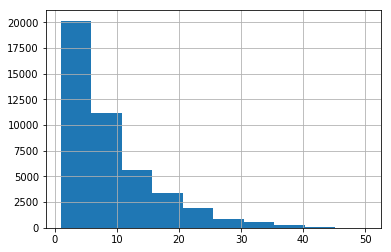

In [130]:
X['YearsCodePro'].hist()

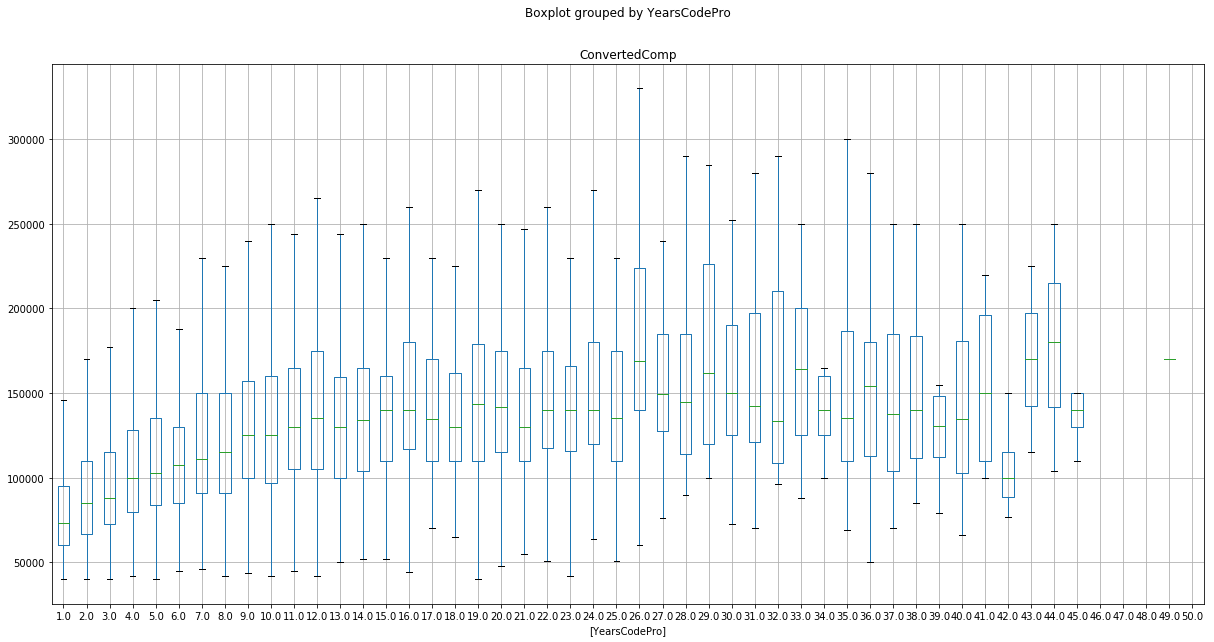

In [84]:
for each_col in numericals: 
    X[[each_col, 'ConvertedComp']].boxplot(by=each_col, showfliers=False, figsize=(20, 10))

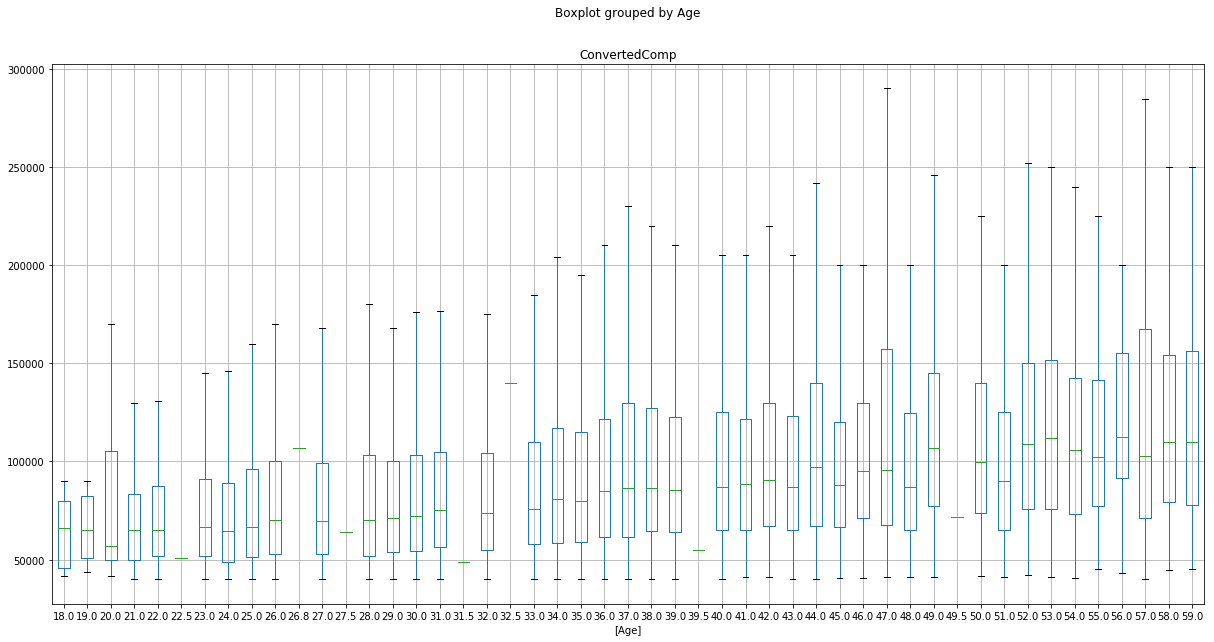

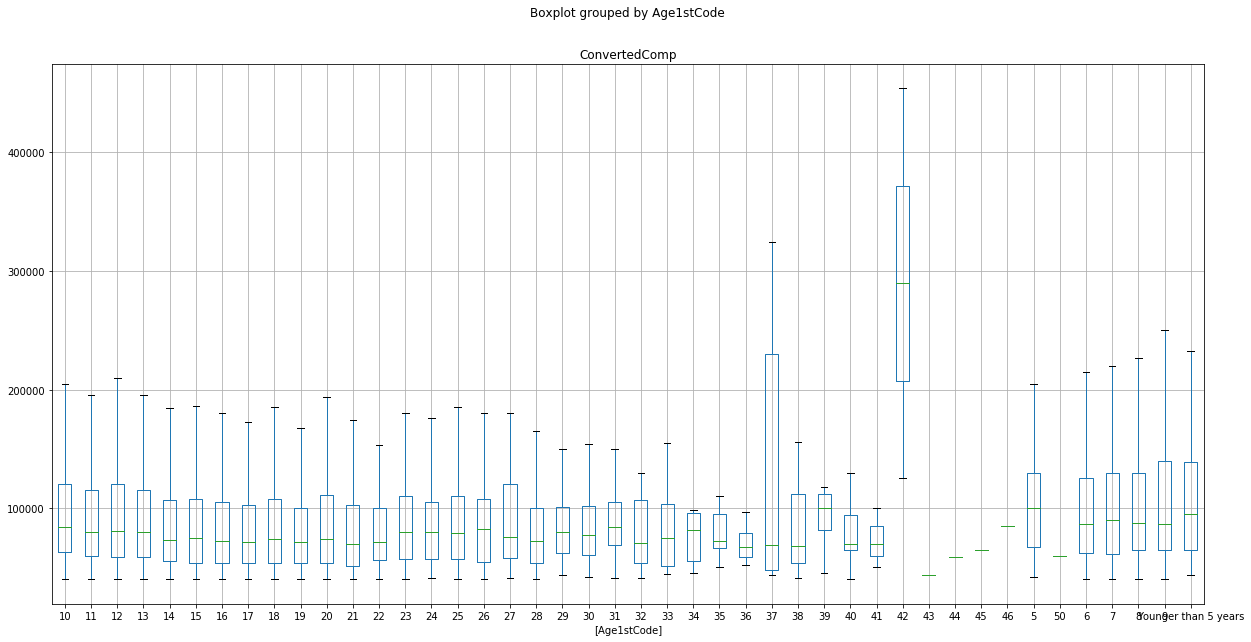

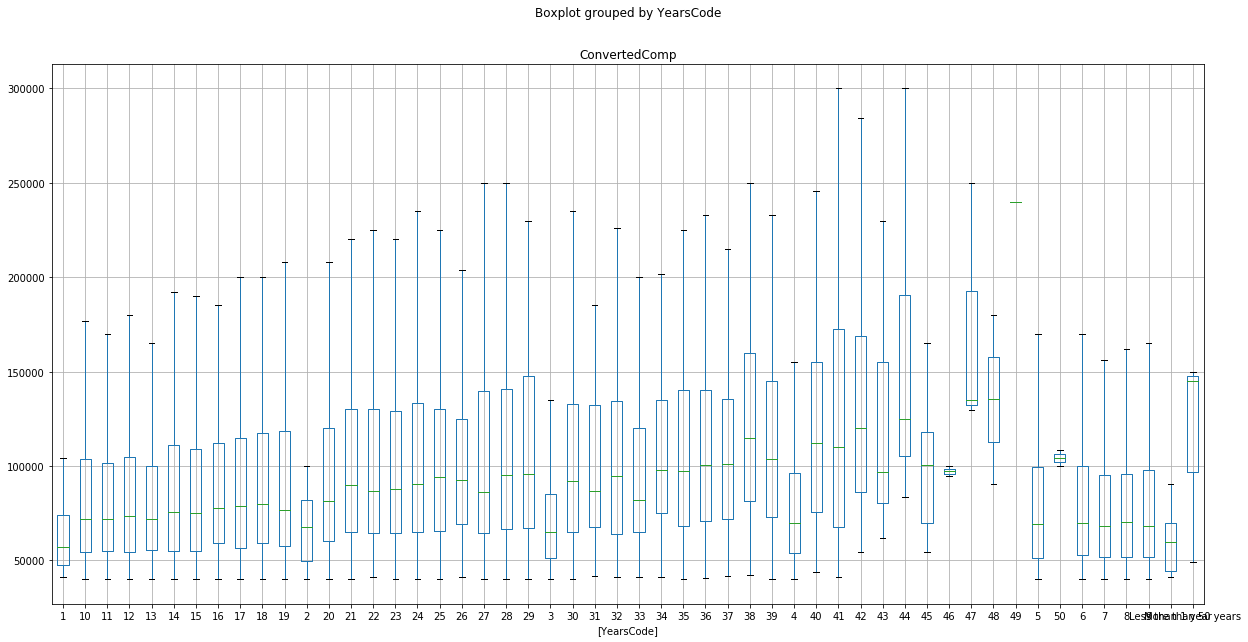

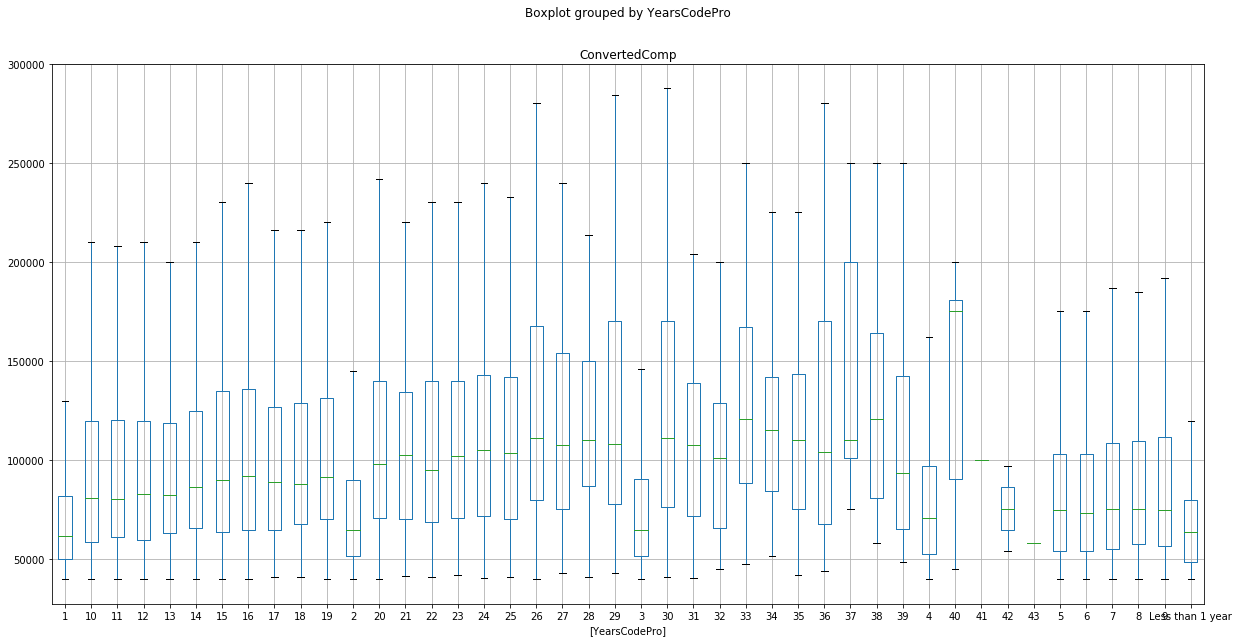

In [53]:
X=df[(df['ConvertedComp']<=500000) & (df['ConvertedComp']>=40000) & (df['Employment']=='Employed full-time') & (df['Age']>17) & (df['Age']<60)]#[['ConvertedComp']]
for each_col in numericals: 
    X[[each_col, 'ConvertedComp']].boxplot(by=each_col, showfliers=False, figsize=(20, 10))

,ConvertedComp
YearsCodePro,
1,539
10,1124
11,432
12,648
13,441
14,360
15,641
16,301
17,216


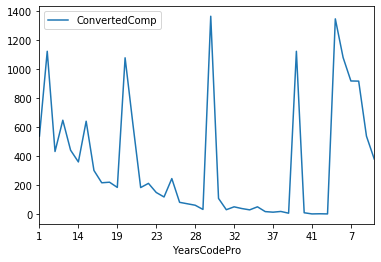

In [104]:

X=df[(df['ConvertedComp']<=500000) & (df['ConvertedComp']>=40000) & (df['Employment']=='Employed full-time') & (df['Age']>17) & (df['Age']<60)]#[['ConvertedComp']]
X[['YearsCodePro', 'ConvertedComp']].groupby('YearsCodePro').count().sort_values(by='YearsCodePro').plot()
X[['YearsCodePro', 'ConvertedComp']].groupby('YearsCodePro').count().sort_values(by='YearsCodePro')
# X[['YearsCodePro', 'ConvertedComp']].plot(kind='scatter', x='YearsCodePro', y='ConvertedComp')

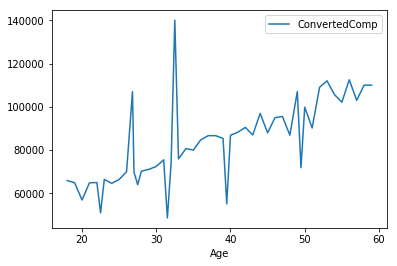

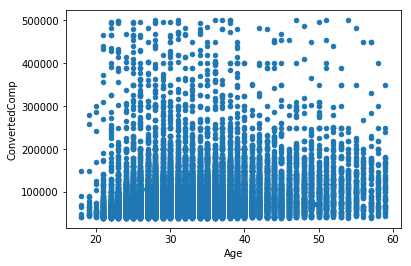

In [34]:
X=df[(df['ConvertedComp']<=500000) & (df['ConvertedComp']>=40000) & (df['Employment']=='Employed full-time') & (df['Age']>17) & (df['Age']<60)]#[['ConvertedComp']]
X[['Age', 'ConvertedComp']].groupby('Age').median().plot()
X[['Age', 'ConvertedComp']].groupby('Age').median()
X[['Age', 'ConvertedComp']].plot(kind='scatter', x='Age', y='ConvertedComp')

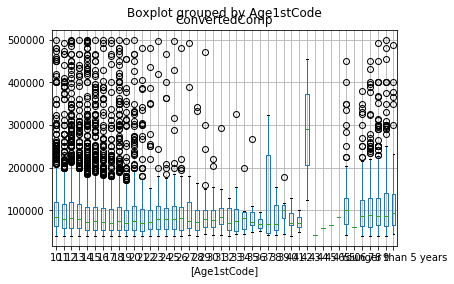

In [36]:
X=df[(df['ConvertedComp']<=500000) & (df['ConvertedComp']>=40000) & (df['Employment']=='Employed full-time') & (df['Age']>17) & (df['Age']<60)]#[['ConvertedComp']]
X[['Age1stCode', 'ConvertedComp']].boxplot(by='Age1stCode')
# X[['Age', 'ConvertedComp']].groupby('Age').median()
# X[['Age', 'ConvertedComp']].plot(kind='scatter', x='Age', y='ConvertedComp')

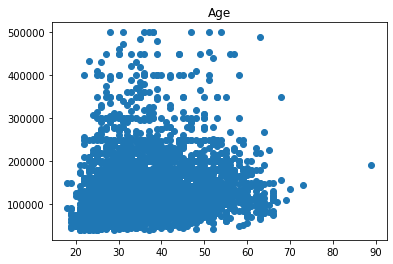

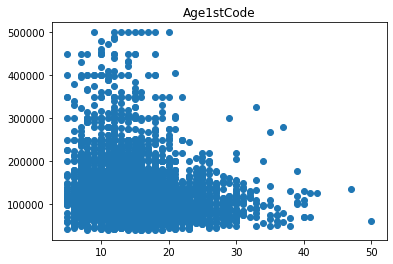

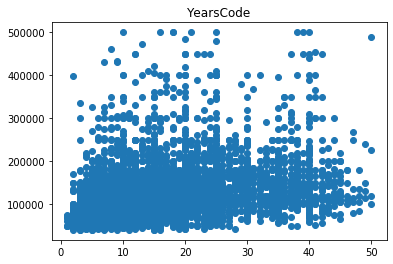

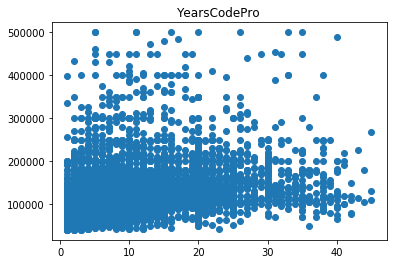

In [50]:
# # fig, ax=plt.subplots(math.ceil(len(numericals)/2), 2)
# # plt.subplots(math.ceil(5/2), 2)
for idx, each_col in enumerate(numericals): 
#     plt.scatter(input_ary[each_col], y, ax=ax[int(idx/2)][int(idx%2)])
    plt.scatter(input_ary[each_col], y)
    plt.title(each_col)
    plt.show()
#     print(ax[0][0])

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
# X=df[['ConvertedComp']]
X=df[(df['ConvertedComp']<=500000) & (df['ConvertedComp']>=40000) & (df['Employment']=='Employed full-time')]#[['ConvertedComp']]
X=X[X['Country']=='United States'][['ConvertedComp']]
for each_col in numericals:
    X=pd.concat([X, pd.to_numeric(df[each_col], errors='coerce')], axis=1)
for each_col in categoricals: 
    X=pd.concat([X, pd.get_dummies(df[each_col])], axis=1)
for each_col in multi_options: 
    X=pd.concat([X, df[each_col].str.get_dummies(sep=';')], axis=1)    
input_ary=X.dropna().drop('ConvertedComp', axis=1)
y=X.dropna()['ConvertedComp']
print(input_ary.shape)
print(sorted(input_ary.columns))
X_train, X_test, y_train, y_test=train_test_split(input_ary, y)
rfr=RandomForestRegressor()
rfr.fit(X_train, y_train)
print(f'Train Score: {rfr.score(X_train, y_train)}')
print(f'Test Score: {rfr.score(X_test, y_test)}')

(5983, 157)
['.NET', '.NET Core', 'A business discipline (such as accounting, finance, marketing, etc.)', 'A health science (such as nursing, pharmacy, radiology, etc.)', 'A humanities discipline (such as literature, history, philosophy, etc.)', 'A natural science (such as biology, chemistry, physics, etc.)', 'A social science (such as anthropology, psychology, political science, etc.)', 'ASP.NET', 'ASP.NET Core', 'AWS', 'Academic researcher', 'Age', 'Age1stCode', 'Android', 'Angular', 'Angular.js', 'Another engineering discipline (such as civil, electrical, mechanical, etc.)', 'Ansible', 'Apache Spark', 'Arduino', 'Assembly', 'Associate degree (A.A., A.S., etc.)', 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', 'Bash/Shell/PowerShell', 'C', 'C#', 'C++', 'Cassandra', 'Chef', 'Computer science, computer engineering, or software engineering', 'Confluence', 'Cordova', 'Couchbase', 'Dart', 'Data or business analyst', 'Data scientist or machine learning specialist', 'Database administrator'

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train Score: 0.8616210803147671
Test Score: 0.2299291117147706


Graphing Age: 5983 x 5983
Graphing Age1stCode: 5983 x 5983
Graphing YearsCode: 5983 x 5983
Graphing YearsCodePro: 5983 x 5983
Graphing I am a developer by profession: 5983 x 5983
Graphing I am a student who is learning to code: 5983 x 5983
Graphing I am not primarily a developer, but I write code sometimes as part of my work: 5983 x 5983
Graphing I code primarily as a hobby: 5983 x 5983
Graphing I used to be a developer by profession, but no longer am: 5983 x 5983
Graphing Associate degree (A.A., A.S., etc.): 5983 x 5983
Graphing Bachelor’s degree (B.A., B.S., B.Eng., etc.): 5983 x 5983
Graphing I never completed any formal education: 5983 x 5983
Graphing Master’s degree (M.A., M.S., M.Eng., MBA, etc.): 5983 x 5983
Graphing Other doctoral degree (Ph.D., Ed.D., etc.): 5983 x 5983
Graphing Primary/elementary school: 5983 x 5983
Graphing Professional degree (JD, MD, etc.): 5983 x 5983
Graphing Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.): 5983 x 5983


ValueError: x and y must be the same size

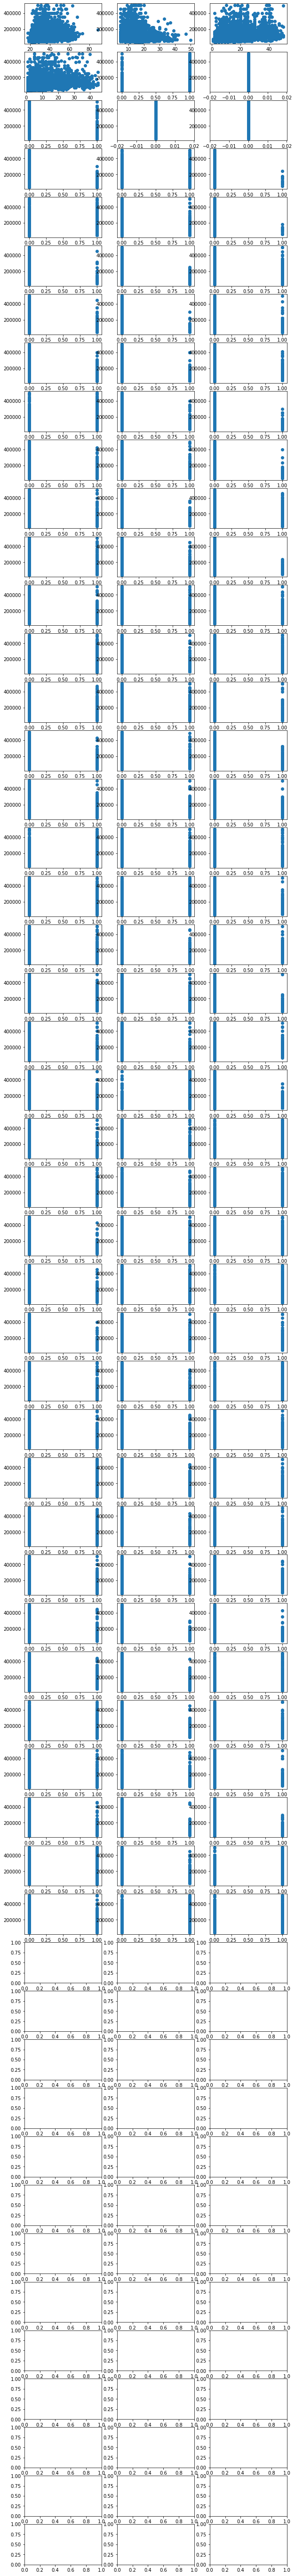

In [74]:
columns=3
columns_list=input_ary.columns
fig, ax=plt.subplots(math.ceil(len(columns_list)/columns), columns, figsize=(10, 100))
for idx, each_col in enumerate(columns_list): 
    print(f'Graphing {each_col}: {len(input_ary[each_col])} x {len(y)}')
    ax[int(idx/columns)][idx%columns].scatter(input_ary[each_col], y)
    
# # ax[int(idx/columns)][idx%columns]

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
# X=df[['ConvertedComp']]
# categoricals=['MainBranch', 'EdLevel', 'UndergradMajor']#, 'Country']
X=df[(df['ConvertedComp']<=500000) & (df['ConvertedComp']>=40000) & (df['Employment']=='Employed full-time')]#[['ConvertedComp']]
X=X[X['Country']=='United States'][['ConvertedComp']]
for each_col in numericals:
    X=pd.concat([X, pd.to_numeric(df[each_col], errors='coerce')], axis=1)
for each_col in categoricals: 
    X=pd.concat([X, pd.get_dummies(df[each_col])], axis=1)
for each_col in multi_options: 
    X=pd.concat([X, df[each_col].str.get_dummies(sep=';')], axis=1)    
input_ary=X.dropna().drop('ConvertedComp', axis=1)
y=X.dropna()['ConvertedComp']
print(input_ary.shape)
print(sorted(input_ary.columns))
X_train, X_test, y_train, y_test=train_test_split(input_ary, y)
rfr=RandomForestRegressor()
rfr.fit(X_train, y_train)
print(f'Train Score: {rfr.score(X_train, y_train)}')
print(f'Test Score: {rfr.score(X_test, y_test)}')

(5983, 157)
['.NET', '.NET Core', 'A business discipline (such as accounting, finance, marketing, etc.)', 'A health science (such as nursing, pharmacy, radiology, etc.)', 'A humanities discipline (such as literature, history, philosophy, etc.)', 'A natural science (such as biology, chemistry, physics, etc.)', 'A social science (such as anthropology, psychology, political science, etc.)', 'ASP.NET', 'ASP.NET Core', 'AWS', 'Academic researcher', 'Age', 'Age1stCode', 'Android', 'Angular', 'Angular.js', 'Another engineering discipline (such as civil, electrical, mechanical, etc.)', 'Ansible', 'Apache Spark', 'Arduino', 'Assembly', 'Associate degree (A.A., A.S., etc.)', 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', 'Bash/Shell/PowerShell', 'C', 'C#', 'C++', 'Cassandra', 'Chef', 'Computer science, computer engineering, or software engineering', 'Confluence', 'Cordova', 'Couchbase', 'Dart', 'Data or business analyst', 'Data scientist or machine learning specialist', 'Database administrator'

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train Score: 0.8552610858985985
Test Score: 0.21086560445563463


In [136]:
sorted(list(zip(rfr.feature_importances_, input_ary.columns)), reverse=True)

[(0.19046254197770188, 'YearsCodePro'),
 (0.01841103450408082, 'Microsoft SQL Server'),
 (0.017335110821957506, 'jQuery'),
 (0.016518821204849418, 'C++'),
 (0.015648007857340246, 'Facebook Workplace'),
 (0.015404805936876789, 'Windows'),
 (0.015212134479529182, 'HTML/CSS'),
 (0.013974511510984847, 'Go'),
 (0.013931513626058475, 'Engineering manager'),
 (0.013127583424824769, 'Google Cloud Platform'),
 (0.013064840797182875, 'Rust'),
 (0.012476249625394321, 'Jira'),
 (0.011959350121924372, 'Confluence'),
 (0.011499889484540943, 'Slack'),
 (0.011106759161237932, 'Docker'),
 (0.011081490402033467, 'Senior executive/VP'),
 (0.010994939786895388, 'Google Suite (Docs, Meet, etc)'),
 (0.01094143300609074, 'Github'),
 (0.010711725268556002, 'PHP'),
 (0.010658972392020601, 'DynamoDB'),
 (0.009980393532015082, 'Linux'),
 (0.009941458102783263, 'JavaScript'),
 (0.009846688565832692, 'SQL'),
 (0.009753458407202358, 'C#'),
 (0.009750062221147177, 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'),


In [38]:
country_list=X['Country'].unique()
fig, ax=plt.subplots(1, 2)
for idx, each_country in enumerate(country_list): 
    X[X['Country']==each_country]['ConvertedComp'].hist(ax=ax[idx%2])
    ax[idx%2].set_title(each_country)
    if (idx%2)!=0:
        plt.show()
        fig, ax=plt.subplots(1, 2)

KeyError: 'Country'

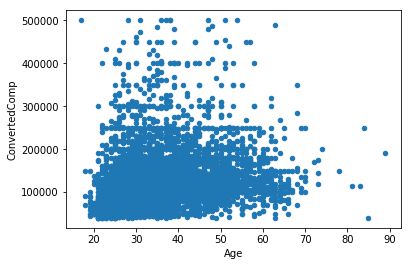

In [38]:
X.plot('Age', 'ConvertedComp', kind='scatter')

In [39]:
len(X)

64461

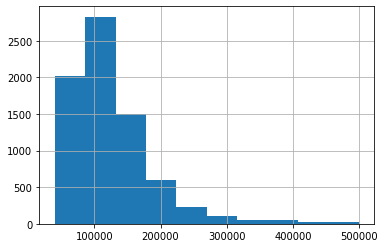

In [129]:
X['ConvertedComp'].hist()

In [49]:
input_ary=X.dropna().drop('ConvertedComp', axis=1)
y=X.dropna()['ConvertedComp']
print(input_ary.shape)
sorted(input_ary.columns)

(5983, 4)


['Age', 'Age1stCode', 'YearsCode', 'YearsCodePro']

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(input_ary, y)
rfr=RandomForestRegressor()
rfr.fit(X_train, y_train)
print(f'Train Score: {rfr.score(X_train, y_train)}')
print(f'Test Score: {rfr.score(X_test, y_test)}')

Train Score: 0.2519919997557962
Test Score: 0.007281143831855741


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [30]:
sorted(list(zip(rfr.feature_importances_, input_ary.columns)), reverse=True)

[(0.6461945257021073, 'YearsCodePro'), (0.3538054742978926, 'YearsCode')]

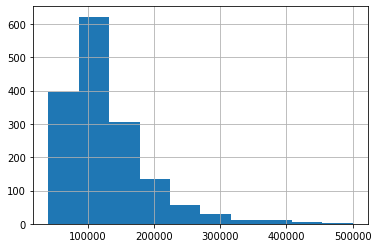

In [116]:
y_test.hist()

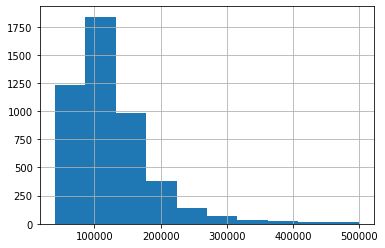

In [117]:
y_train.hist()

In [118]:
sample=random.randint(0, len(input_ary))
print(f'Sample {sample}: Predicted {rfr.predict([input_ary.iloc[sample]])} vs. Actual {y.iloc[sample]}')

Sample 1895: Predicted [147200.] vs. Actual 115000.0


# Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# scaler=StandardScaler()
# scaler.fit(X_train)
# X_train=scaler.transform(X_train)
# X_test=scaler.transform(X_test)

lr=LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)
# lr.fit(input_ary, y)
# lr.score(input_ary, y)

0.10458292668266389

In [120]:
pd.concat([input_ary, y], axis=1).corr()

,Age,Age1stCode,YearsCode,YearsCodePro,I am a developer by profession,I am a student who is learning to code,"I am not primarily a developer, but I write code sometimes as part of my work",I code primarily as a hobby,"I used to be a developer by profession, but no longer am","Associate degree (A.A., A.S., etc.)",...,United Republic of Tanzania,United States,Uruguay,Uzbekistan,"Venezuela, Bolivarian Republic of...",Viet Nam,Yemen,Zambia,Zimbabwe,ConvertedComp
Age,1.000000,0.024958,0.804631,0.848196,-0.087827,NaN,0.087827,NaN,NaN,0.022553,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.238432
Age1stCode,0.024958,1.000000,-0.339182,-0.165010,-0.015597,NaN,0.015597,NaN,NaN,0.026562,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.155800
YearsCode,0.804631,-0.339182,1.000000,0.889315,-0.034693,NaN,0.034693,NaN,NaN,-0.005927,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.310869
YearsCodePro,0.848196,-0.165010,0.889315,1.000000,-0.000252,NaN,0.000252,NaN,NaN,0.003058,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.318865
I am a developer by profession,-0.087827,-0.015597,-0.034693,-0.000252,1.000000,NaN,-1.000000,NaN,NaN,0.001171,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# sorted(list(zip(lr.feature_importances_, input_ary.columns)), reverse=True)

In [36]:
sample=random.randint(0, len(input_ary))
print(f'Sample {sample}: Predicted {lr.predict([input_ary.iloc[sample]])} vs. Actual {y.iloc[sample]}')

Sample 20939: Predicted [118998.] vs. Actual 125000.0


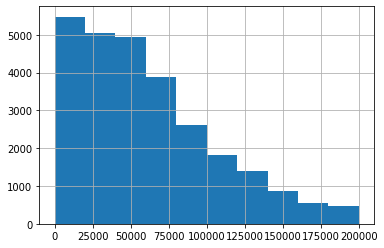

In [37]:
y.hist()

In [38]:
sorted(list(zip(lr.coef_, input_ary.columns)), reverse=True)

[(2426023947109233.5, 'I am a student who is learning to code'),
 (991503667328940.0, 'I code primarily as a hobby'),
 (262347868603312.0, 'Bahamas'),
 (61453302869705.805, 'Cape Verde'),
 (34734744215985.87, 'Burundi'),
 (16391583293851.691, 'Antigua and Barbuda'),
 (5609401917969.099, 'Liechtenstein'),
 (4662689295839.5625, 'Gambia'),
 (4458970706911.093, 'Libyan Arab Jamahiriya'),
 (2961356137186.703, 'Fiji'),
 (2141773325017.5042, 'Gabon'),
 (1895532133566.1768, 'Namibia'),
 (1799020161363.7231, 'Haiti'),
 (1461234517251.7798, 'Nauru'),
 (1301073169372.9092, 'Mozambique'),
 (1057935901761.39, 'Marshall Islands'),
 (983958561692.1804, 'Kiribati'),
 (626715583880.5612, 'Mauritania'),
 (273428562908.77737, 'Maldives'),
 (269915350742.3785, 'Papua New Guinea'),
 (167522928663.7578, 'Solomon Islands'),
 (141124257780.9145, 'Saint Lucia'),
 (14951.126206144287, 'I never completed any formal education'),
 (13407.59375, 'Engineering manager'),
 (12287.200543561921, 'Other doctoral degree (

In [39]:
y_test.max()

200000.0

In [40]:
import numpy as np
np.max(lr.predict(X_test))

343840236338071.0

In [47]:
lr.intercept_

5042936115521417.0

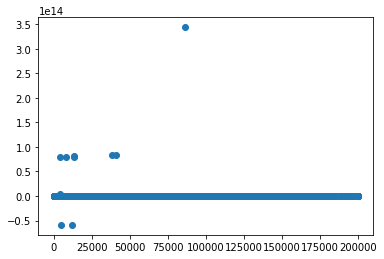

In [41]:
plt.scatter(y_test, lr.predict(X_test))

(array([2.00e+00, 6.76e+03, 0.00e+00, 6.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00]),
 array([-5.88412927e+13, -1.85731398e+13,  2.16950131e+13,  6.19631660e+13,
         1.02231319e+14,  1.42499472e+14,  1.82767625e+14,  2.23035778e+14,
         2.63303931e+14,  3.03572083e+14,  3.43840236e+14]),
 <a list of 10 Patch objects>)

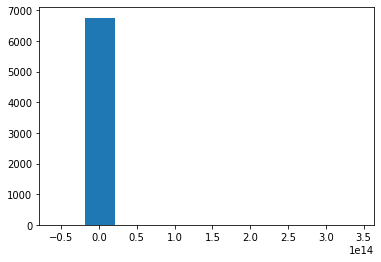

In [46]:
plt.hist(lr.predict(X_test))

In [430]:
print(categoricals)
print(numericals)
print(multi_options)

['MainBranch', 'EdLevel', 'UndergradMajor', 'Country']
['Age', 'Age1stCode', 'YearsCode', 'YearsCodePro']
[]


['MainBranch', 'EdLevel', 'UndergradMajor', 'Country']

['Age', 'Age1stCode', 'YearsCode', 'YearsCodePro']

[]

LR - -244864609971947.5

RFR - 0.6037828435133481

In [91]:
list(input_ary.columns)

['Age',
 'Age1stCode',
 'YearsCode',
 'YearsCodePro',
 'I am a developer by profession',
 'I am a student who is learning to code',
 'I am not primarily a developer, but I write code sometimes as part of my work',
 'I code primarily as a hobby',
 'I used to be a developer by profession, but no longer am',
 'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo, Republic of the...',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 "Côte d'Ivoire",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',

In [24]:
categoricals={}
for col, col_type in df.dtypes.iteritems(): 
    if col_type=='O':
        categoricals[col]=df[col].nunique()
#         print(f'{col} is {col_type}')
        
categoricals

{'MainBranch': 5,
 'Hobbyist': 2,
 'Age1stCode': 63,
 'CompFreq': 3,
 'Country': 183,
 'CurrencyDesc': 142,
 'CurrencySymbol': 141,
 'DatabaseDesireNextYear': 3193,
 'DatabaseWorkedWith': 2808,
 'DevType': 8269,
 'EdLevel': 9,
 'Employment': 7,
 'Ethnicity': 208,
 'Gender': 7,
 'JobFactors': 230,
 'JobSat': 5,
 'JobSeek': 3,
 'LanguageDesireNextYear': 16243,
 'LanguageWorkedWith': 14256,
 'MiscTechDesireNextYear': 5216,
 'MiscTechWorkedWith': 2730,
 'NEWCollabToolsDesireNextYear': 1277,
 'NEWCollabToolsWorkedWith': 1153,
 'NEWDevOps': 3,
 'NEWDevOpsImpt': 5,
 'NEWEdImpt': 5,
 'NEWJobHunt': 2172,
 'NEWJobHuntResearch': 63,
 'NEWLearn': 4,
 'NEWOffTopic': 3,
 'NEWOnboardGood': 3,
 'NEWOtherComms': 2,
 'NEWOvertime': 5,
 'NEWPurchaseResearch': 63,
 'NEWPurpleLink': 4,
 'NEWSOSites': 61,
 'NEWStuck': 444,
 'OpSys': 4,
 'OrgSize': 9,
 'PlatformDesireNextYear': 7471,
 'PlatformWorkedWith': 6287,
 'PurchaseWhat': 3,
 'Sexuality': 14,
 'SOAccount': 3,
 'SOComm': 6,
 'SOPartFreq': 6,
 'SOVisitF

In [74]:
ohe.get_feature_names()

array(['x0_Man',
       'x0_Man;Non-binary, genderqueer, or gender non-conforming',
       'x0_Non-binary, genderqueer, or gender non-conforming', 'x0_Woman',
       'x0_Woman;Man',
       'x0_Woman;Man;Non-binary, genderqueer, or gender non-conforming',
       'x0_Woman;Non-binary, genderqueer, or gender non-conforming'],
      dtype=object)

In [75]:
df['Gender'].str.get_dummies(sep=';')

,Man,"Non-binary, genderqueer, or gender non-conforming",Woman
0,1,0,0
1,0,0,0
2,0,0,0
3,1,0,0
4,1,0,0
...,...,...,...
64456,0,0,0
64457,0,0,0
64458,0,0,0
64459,0,0,0


In [53]:
for each_col in categoricals: 
    if categoricals[each_col]<100: 
        print(f'{each_col} options: {df[each_col].unique()}')
        print('='*20)

MainBranch options: ['I am a developer by profession' 'I code primarily as a hobby'
 'I used to be a developer by profession, but no longer am'
 'I am not primarily a developer, but I write code sometimes as part of my work'
 'I am a student who is learning to code' nan]
Hobbyist options: ['Yes' 'No' nan]
Age1stCode options: ['13' '19' '15' '18' '16' '14' '12' '20' '42' '8' '25' '22' '30' '17' '21'
 '10' '46' '9' '7' '11' '6' nan '31' '29' '5' 'Younger than 5 years' '28'
 '38' '23' '27' '41' '24' '53' '26' '35' '32' '40' '33' '36' '54' '48'
 '56' '45' '44' '34' 'Older than 85' '39' '51' '68' '50' '37' '47' '43'
 '52' '85' '64' '55' '58' '49' '76' '72' '73' '83' '63']
CompFreq options: ['Monthly' nan 'Yearly' 'Weekly']
EdLevel options: ['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'
 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)' nan
 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'
 'Professional degree (JD, MD, etc.)'
 'Some college/university st

In [44]:
comp_cols=['CompFreq','CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc','CurrencySymbol']
comp_df=df[comp_cols].dropna()
comp_df[comp_df['CompFreq']=='Weekly']

,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol
85,Weekly,2.000000e+03,108100.0,France,European Euro,EUR
121,Weekly,1.200000e+05,2000000.0,United States,United States dollar,USD
132,Weekly,3.250000e+03,210050.0,United Kingdom,Pound sterling,GBP
173,Weekly,7.600000e+02,41100.0,Netherlands,European Euro,EUR
191,Weekly,1.200000e+05,2000000.0,United States,United States dollar,USD
...,...,...,...,...,...,...
63762,Weekly,1.600000e+03,80000.0,United States,United States dollar,USD
63925,Weekly,8.740000e+09,1000000.0,Afghanistan,Afghan afghani,AFN
63993,Weekly,5.521171e+09,1000000.0,Afghanistan,Afghan afghani,AFN
64035,Weekly,6.600000e+04,2000000.0,United States,United States dollar,USD


(-2000.001, 100000.0]     26847
(100000.0, 200000.0]       5603
(200000.0, 300000.0]        686
(900000.0, 1000000.0]       338
(1900000.0, 2000000.0]      265
(300000.0, 400000.0]        235
(400000.0, 500000.0]        159
(500000.0, 600000.0]        154
(600000.0, 700000.0]        133
(700000.0, 800000.0]        110
(800000.0, 900000.0]         93
(1400000.0, 1500000.0]       22
(1100000.0, 1200000.0]       22
(1000000.0, 1100000.0]       21
(1200000.0, 1300000.0]       17
(1700000.0, 1800000.0]       14
(1300000.0, 1400000.0]       13
(1600000.0, 1700000.0]       13
(1500000.0, 1600000.0]        6
(1800000.0, 1900000.0]        5
Name: ConvertedComp, dtype: int64

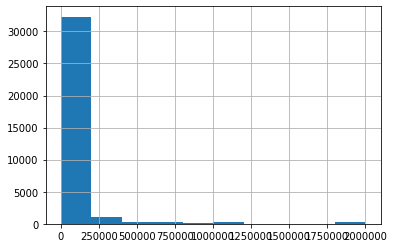

In [52]:
# comp_df[comp_df['ConvertedComp']<500000]['ConvertedComp'].hist()
# comp_df[comp_df['ConvertedComp']<500000]['ConvertedComp'].value_counts(bins=10)
comp_df['ConvertedComp'].hist()
comp_df['ConvertedComp'].value_counts(bins=20)

In [35]:
currency_api_url='https://api.exchangeratesapi.io/latest?base=USD'
response=requests.get(currency_api_url)
currency_conv=response.json()['rates']
currency_conv

{'CAD': 1.2857142857,
 'HKD': 7.7506373879,
 'ISK': 125.0925240563,
 'PHP': 48.0549387285,
 'DKK': 6.1213093182,
 'HUF': 294.9008964553,
 'CZK': 21.8093593223,
 'GBP': 0.7425117197,
 'RON': 4.0073196809,
 'SEK': 8.4363845711,
 'IDR': 14164.2980508265,
 'INR': 73.7523645037,
 'BRL': 5.1615264413,
 'RUB': 74.0750884119,
 'HRK': 6.2024015133,
 'JPY': 103.9888148696,
 'THB': 30.1603750308,
 'CHF': 0.8900402994,
 'EUR': 0.8224360556,
 'MYR': 4.0600378321,
 'BGN': 1.6085204375,
 'TRY': 7.7832058557,
 'CNY': 6.5318693972,
 'NOK': 8.7670038654,
 'NZD': 1.4190311703,
 'ZAR': 15.1882556131,
 'USD': 1.0,
 'MXN': 19.828193108,
 'SGD': 1.3328398717,
 'AUD': 1.3477259643,
 'ILS': 3.2667160128,
 'KRW': 1086.109055021,
 'PLN': 3.6819639773}

In [37]:
#df['Comp_USD']=
df.dropna()
df.apply(lambda x: x['CompTotal']/currency_conv['CurrencySymbol'])# if x['CurrencySymbol'] != 'USD')

KeyError: ('CompTotal', 'occurred at index Respondent')